In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [125]:
df = pd.read_excel('diabetes_data.xlsx')

In [126]:
#Initial anlaysis
df.shape

(101766, 51)

In [127]:
df.describe()

,id,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,50883.500000,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,29377.458084,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,25442.250000,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,50883.500000,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,76324.750000,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,101766.000000,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [128]:
df.head().T

,0,1,2,3,4
id,1,2,3,4,5
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

In [130]:
df.isnull().sum()

id                          0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamid

In [131]:
df.nunique()

id                          101766
encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide      

In [132]:
df['readmitted'].value_counts() 

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [133]:
#target seems bit imbalnced if plannning to Predict High Medium Low 

# 1. Clean the data and handling Missing Values

In [134]:
#i can see question marks in the dataset filling those values with nan
df = df.replace('?',np.nan)

In [135]:
df.isnull().sum().sort_values(ascending=False)

weight                      98569
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
id                              0
troglitazone                    0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
citoglipton                     0
tolazamide                      0
examide                         0
glimepiride                     0
insulin                         0
glyburide.metformin             0
glipizide.metformin             0
glimepiride.pioglitazone        0
metformin.rosiglitazone         0
metformin.pioglitazone          0
change                          0
diabetesMed                     0
acetohexamide                   0
metformin     

In [136]:
df['weight'].isnull().sum()/len(df) *100
#97 percent data missing

96.85847925633315

In [137]:
df['medical_specialty'].isnull().sum()/len(df)*100
#Medical speciality column 49 percent data is missing,
#but imputing this might introduce bias so removing it.
#we have diagnose codes which can help us diagnose compare to this feature

49.08220820313268

In [138]:
df['payer_code'].isnull().sum()/len(df)*100 
#around 40 percent data is missing

39.5574160328597

In [139]:
#Dropping above Columns
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [140]:
df.shape

(101766, 48)

In [141]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [142]:
#Replace nan values by mode of respective column group by patient number if mode not available replace with Other

def fill_mode(group):
    mode_series = group.mode()
    if not mode_series.empty:
        return group.fillna(mode_series.iloc[0])
    else:
        return group.fillna('Other')

# Applying the function to fill missing values in the 'race' column grouped by patient number
df['race'] = df.groupby('patient_nbr',group_keys=False)['race'].apply(fill_mode)

In [143]:
#Planning to drop these diag Rows
df = df.dropna()
df.shape

(100244, 48)

In [144]:
df.isnull().sum() # Missing values Fixed

id                          0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

# Handling Outliers,Removing Invaluable Features and rows

In [145]:
set(df.dtypes) # there are two types data in our data frame now Let's explore

{dtype('int64'), dtype('O')}

In [146]:
#considering age as a numerical column to capture mean of earlier records and max and min

In [147]:
#age can be numeric so picking mean values  
age_map = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
# Encode age range to integer labels
df['age'] = df['age'].map(age_map)

In [148]:
[col for col in df.columns if df[col].dtype=='int64']

['id',
 'encounter_id',
 'patient_nbr',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [149]:
numerical_cols=[
    'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']  # id,encounterId,patient_nbr are not related to target

In [150]:
df[numerical_cols].nunique()

age                          10
admission_type_id             8
discharge_disposition_id     26
admission_source_id          17
time_in_hospital             14
num_lab_procedures          118
num_procedures                7
num_medications              75
number_outpatient            39
number_emergency             33
number_inpatient             20
number_diagnoses             14
dtype: int64

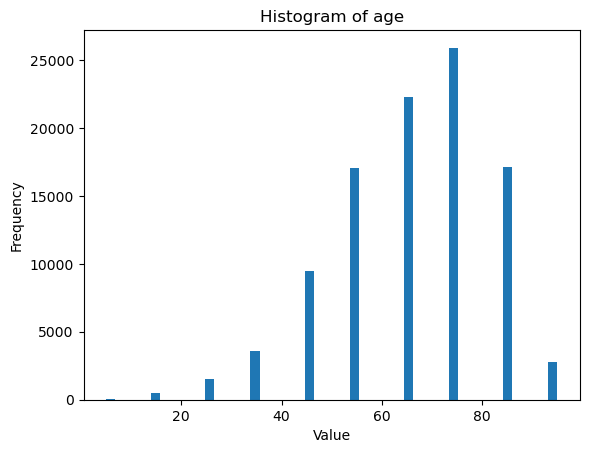

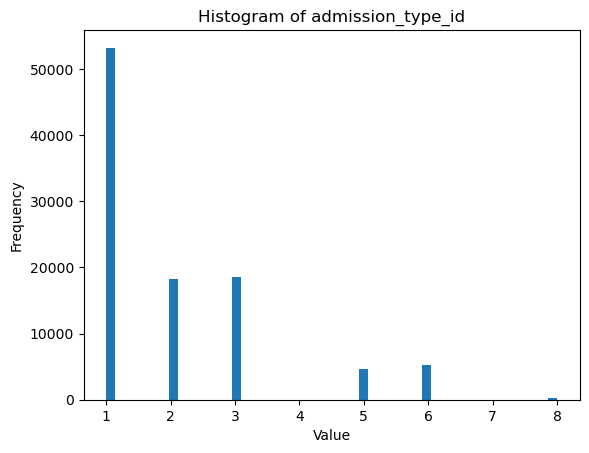

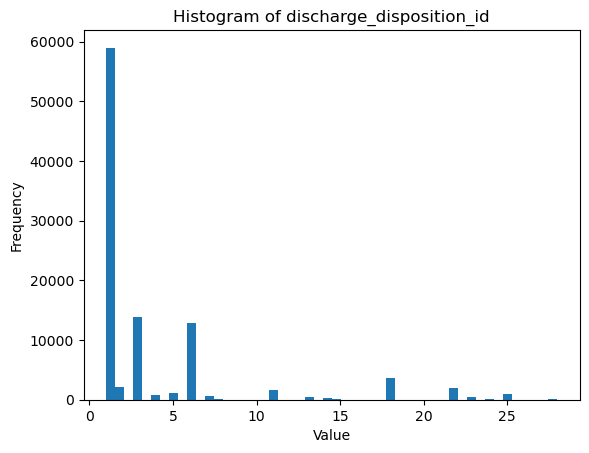

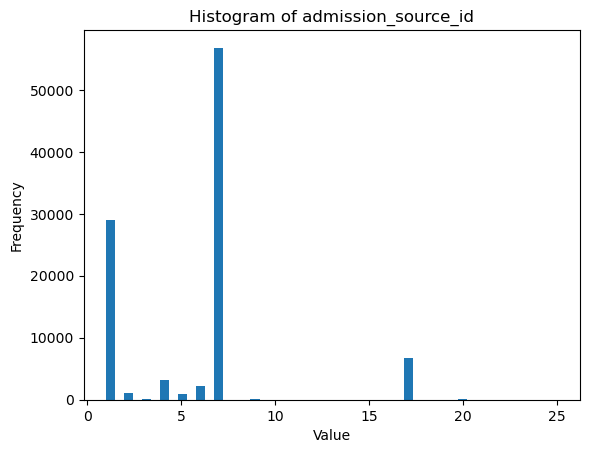

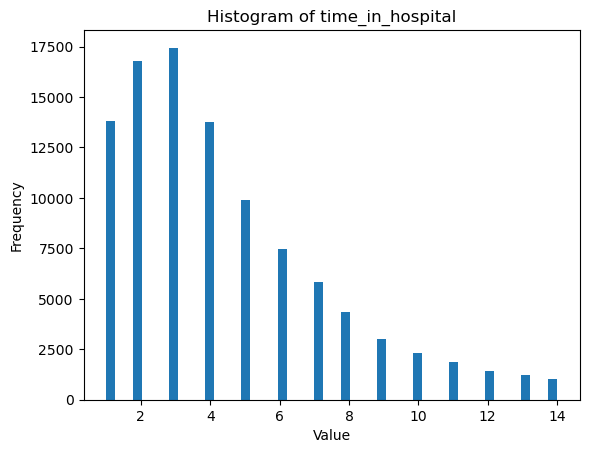

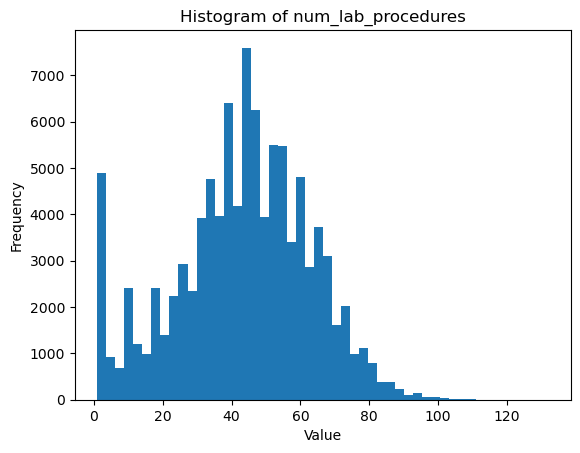

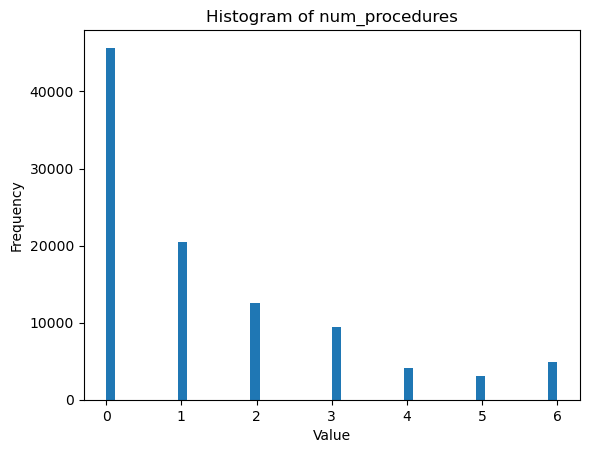

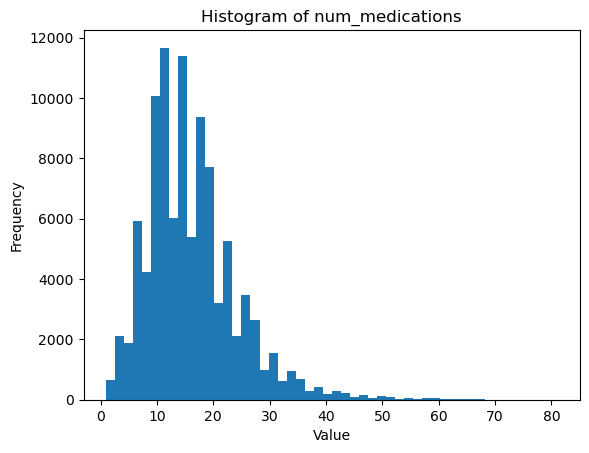

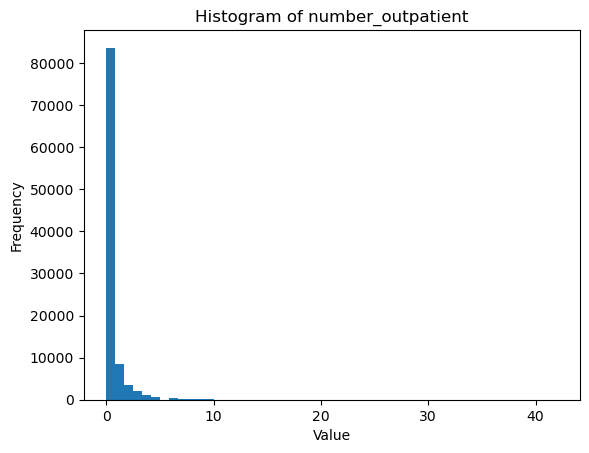

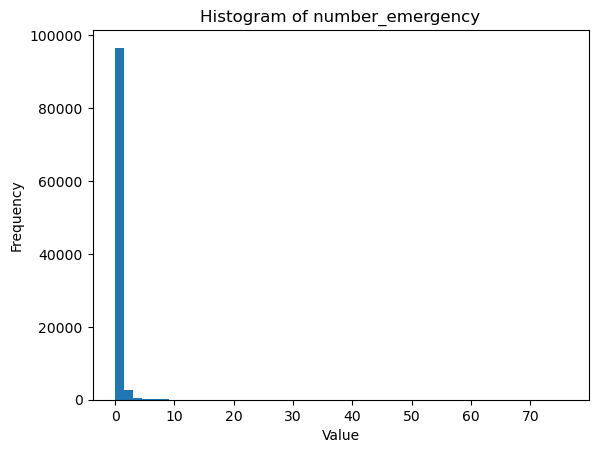

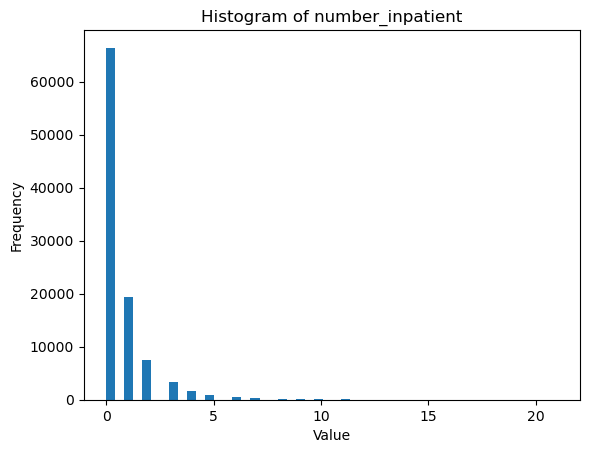

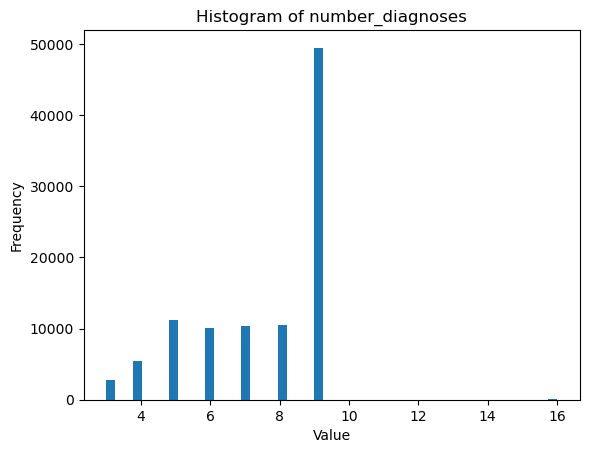

In [151]:
# Visualize their histograms
for col in numerical_cols:
    plt.hist(df[col], bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [152]:
#we can only consider three columns as numerical because others are looks categorical can be binned
numerical_cols=['num_lab_procedures','num_medications','age']

In [153]:
df[numerical_cols].nunique()

num_lab_procedures    118
num_medications        75
age                    10
dtype: int64

In [154]:
#converting to object types   
df['admission_type_id']=df['admission_type_id'].astype('object')
df['discharge_disposition_id']=df['discharge_disposition_id'].astype('object')
df['admission_source_id']=df['admission_source_id'].astype('object')
df['time_in_hospital']=df['time_in_hospital'].astype('object')
df['num_procedures']=df['num_procedures'].astype('object')
df['number_outpatient']=df['number_outpatient'].astype('object')
df['number_emergency']=df['number_emergency'].astype('object')
df['number_inpatient']=df['number_inpatient'].astype('object')
df['number_diagnoses']=df['number_diagnoses'].astype('object')

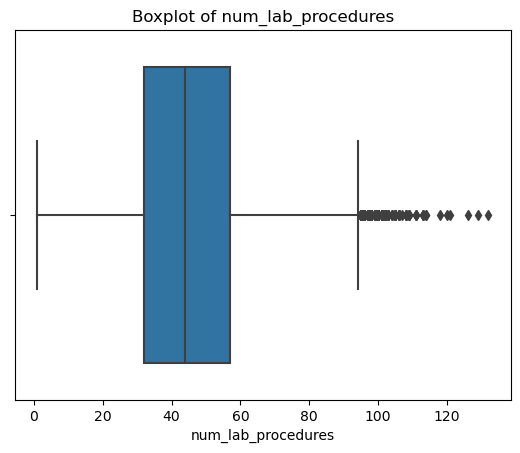

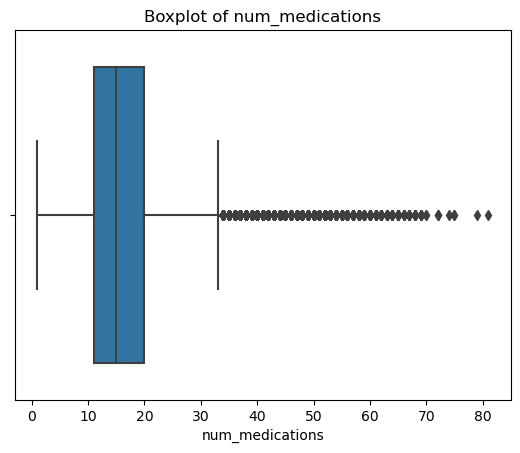

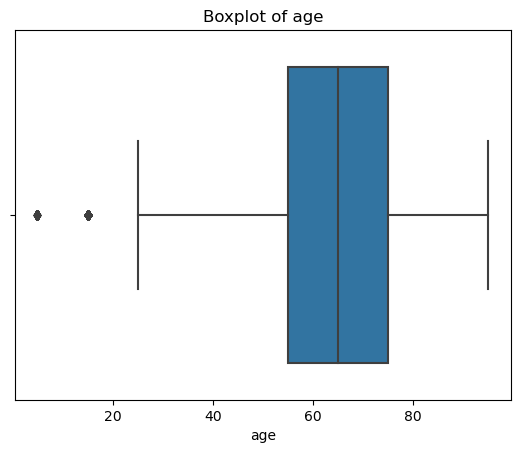

In [155]:
#Numerical columns look in box plot
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [156]:
print(df.shape)
#handling Outliers is 
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(col,'lower_bound',lower_bound)
    print(col,'upper_bound',upper_bound)

(100244, 48)
num_lab_procedures lower_bound -5.5
num_lab_procedures upper_bound 94.5
num_medications lower_bound -2.5
num_medications upper_bound 33.5
age lower_bound 25.0
age upper_bound 105.0


In [157]:
df.shape

(96154, 48)

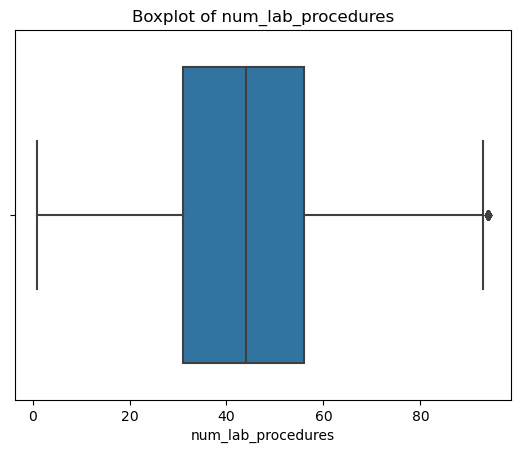

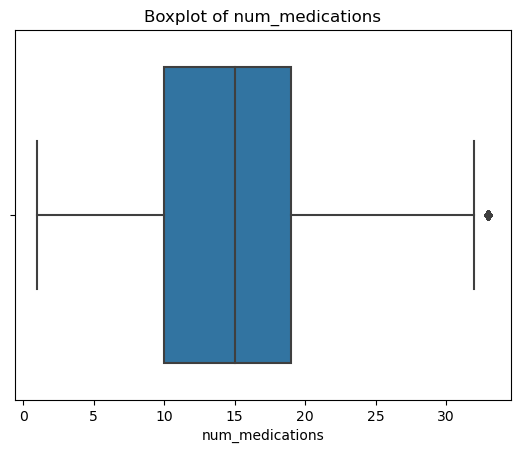

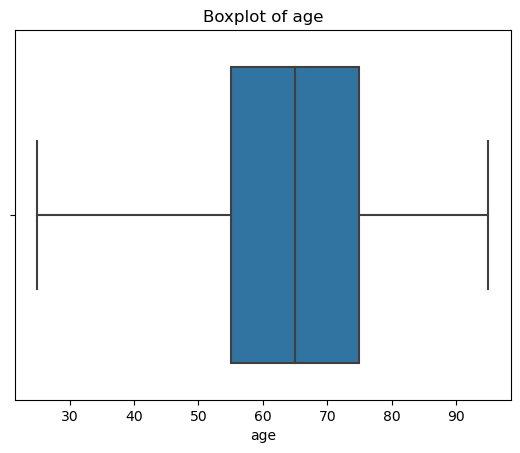

In [158]:
#Numerical columns look in box plot
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [159]:
df.shape

(96154, 48)

In [160]:
#if one value accounts for 95% of the data points), it might not be very useful 
low_variance_cols = []
for col in df.columns:
    # Get the value count percentages
    val_counts = df[col].value_counts(normalize=True) * 100
    if val_counts.iloc[0] > 95:
        low_variance_cols.append(col)
print(f"Low Variance Columns: {low_variance_cols}")

Low Variance Columns: ['repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide.metformin', 'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone', 'metformin.pioglitazone']


In [161]:
for col in df[low_variance_cols]:
    print(df[col].value_counts())
    print('-------------------------------------')

No        94679
Steady     1330
Up          101
Down         44
Name: repaglinide, dtype: int64
-------------------------------------
No        95493
Steady      627
Up           23
Down         11
Name: nateglinide, dtype: int64
-------------------------------------
No        96076
Steady       71
Up            6
Down          1
Name: chlorpropamide, dtype: int64
-------------------------------------
No    96154
Name: acetohexamide, dtype: int64
-------------------------------------
No        96132
Steady       22
Name: tolbutamide, dtype: int64
-------------------------------------
No        95869
Steady      273
Up            9
Down          3
Name: acarbose, dtype: int64
-------------------------------------
No        96119
Steady       29
Down          4
Up            2
Name: miglitol, dtype: int64
-------------------------------------
No        96151
Steady        3
Name: troglitazone, dtype: int64
-------------------------------------
No        96118
Steady       35
Up          

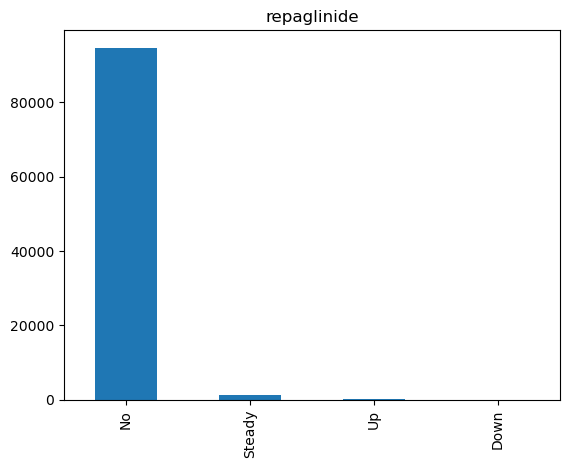

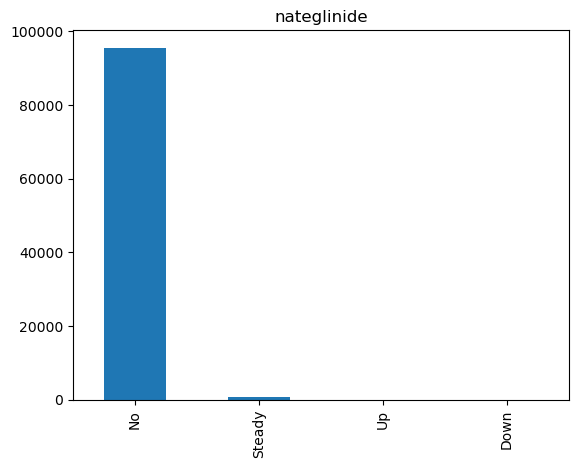

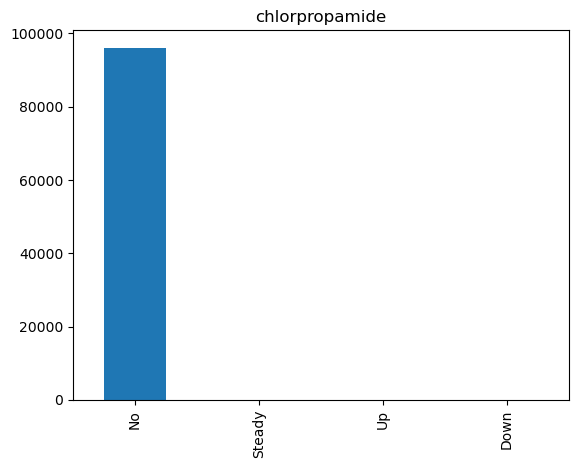

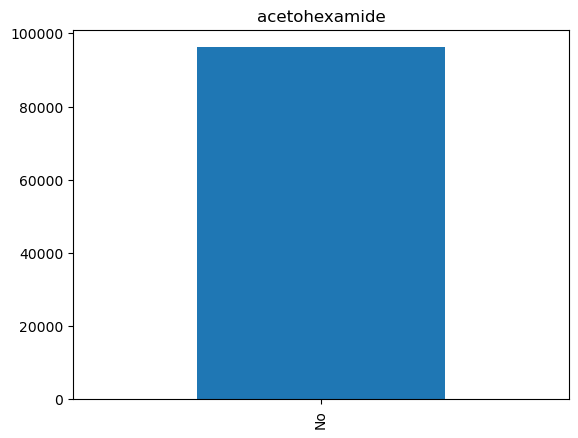

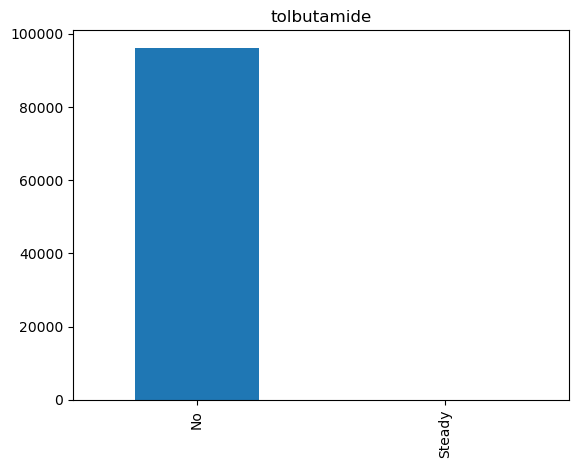

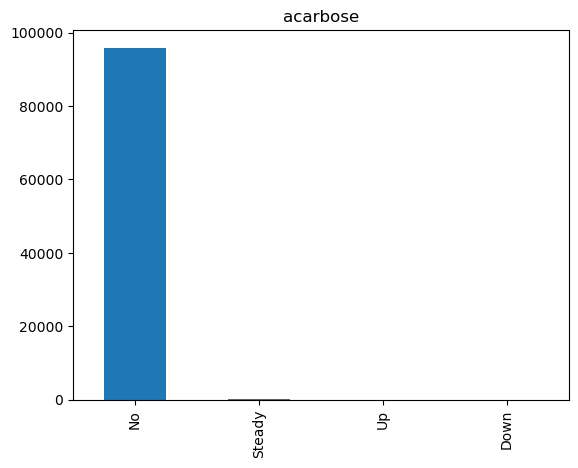

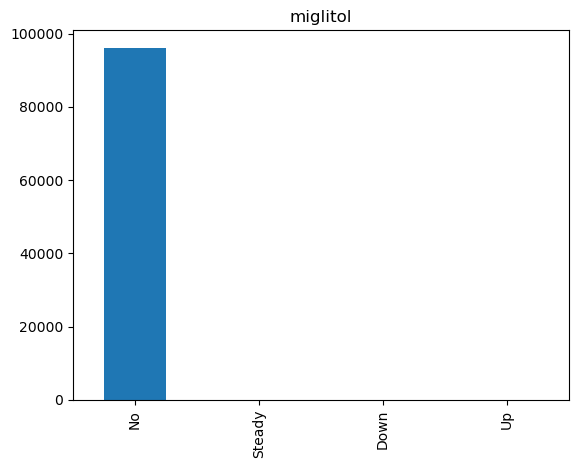

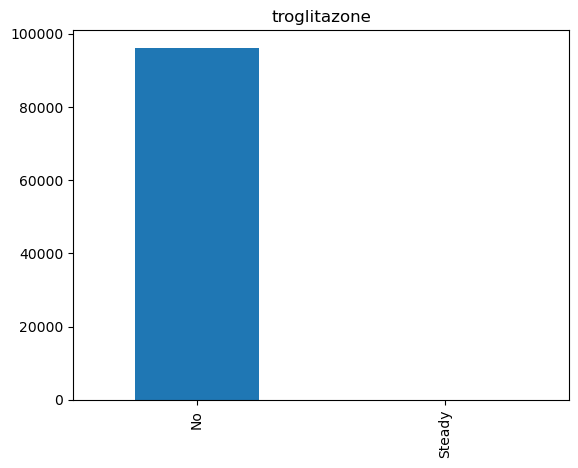

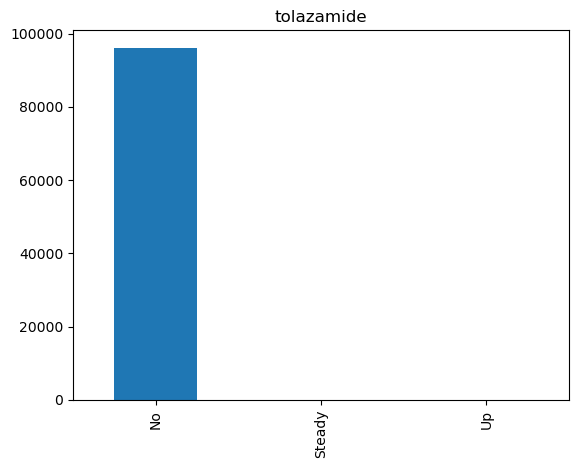

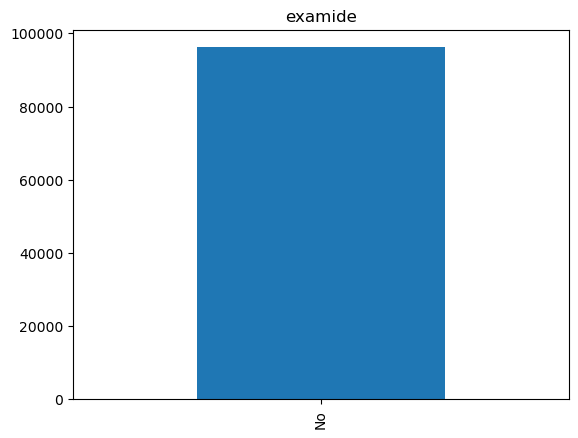

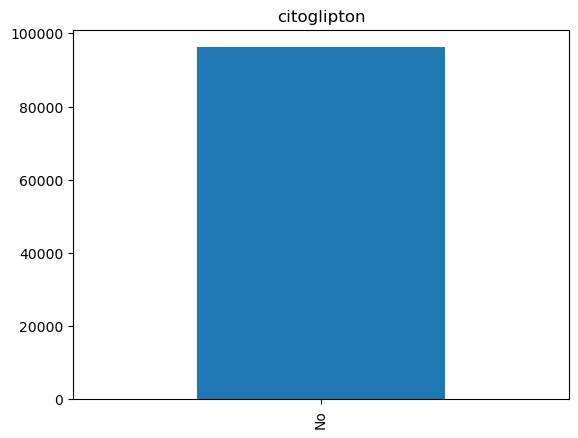

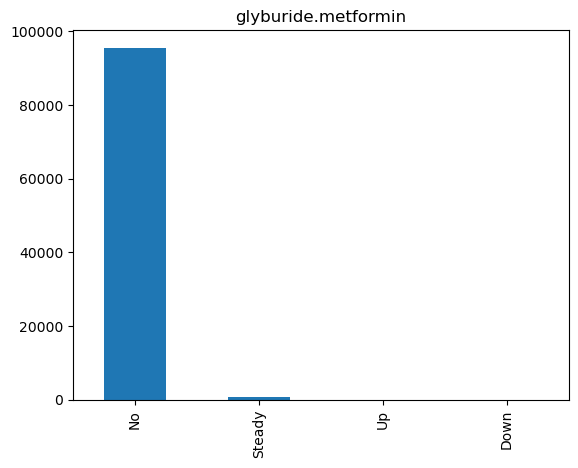

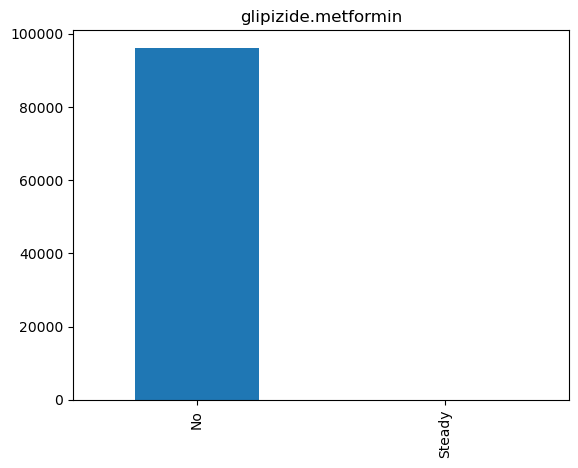

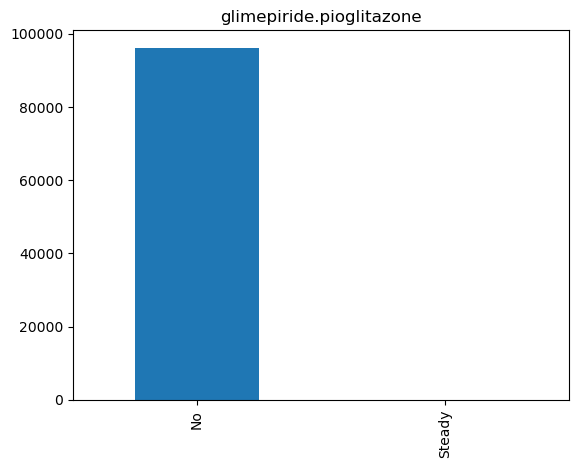

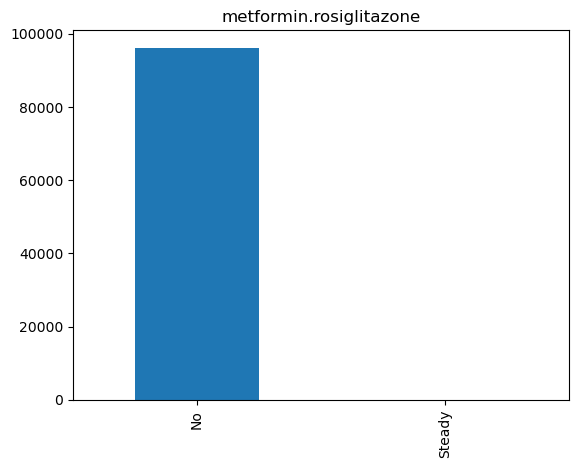

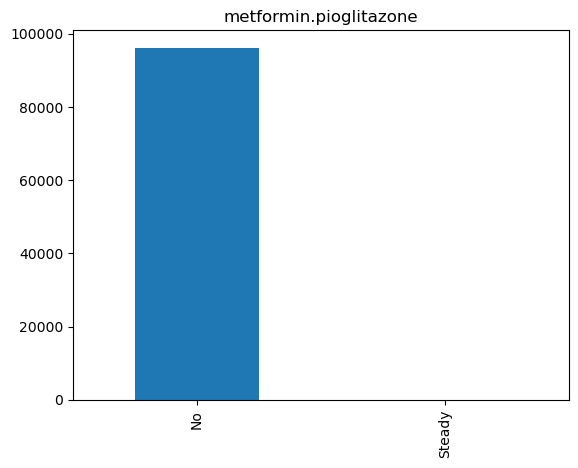

In [162]:
for col in df[low_variance_cols]:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

In [163]:
# based on above data and visualization it is clear that one value is more than 95
# percent of other values  are very less so discarding
# Drop the low-variance columns
df = df.drop(columns=low_variance_cols)

In [164]:
df.shape

(96154, 32)

In [165]:
categorical_columns =[c for c in df.columns if df[c].dtype=='object']

In [166]:
categorical_columns

['race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_procedures',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

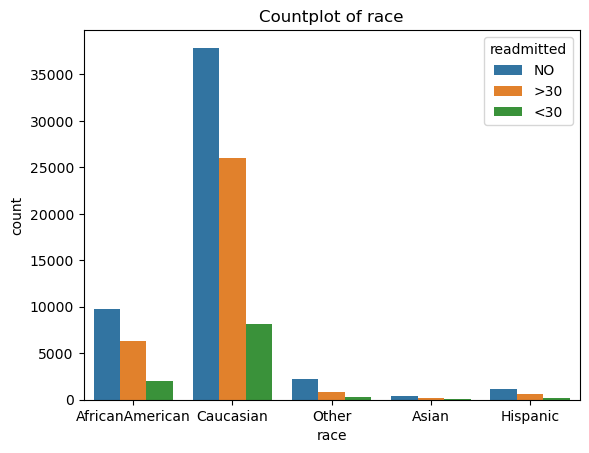

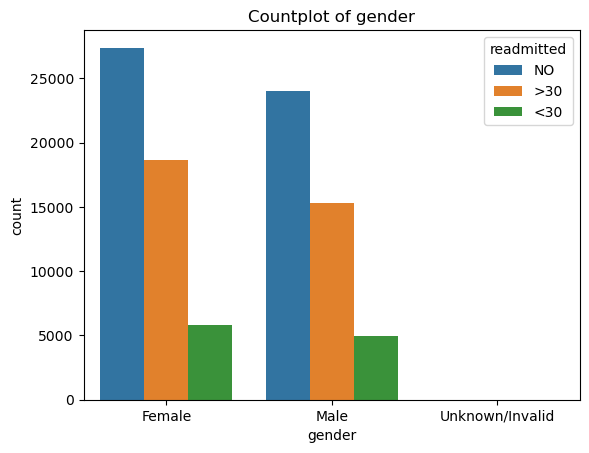

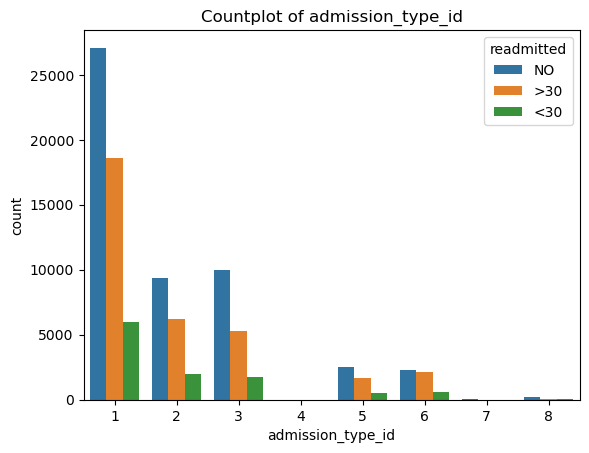

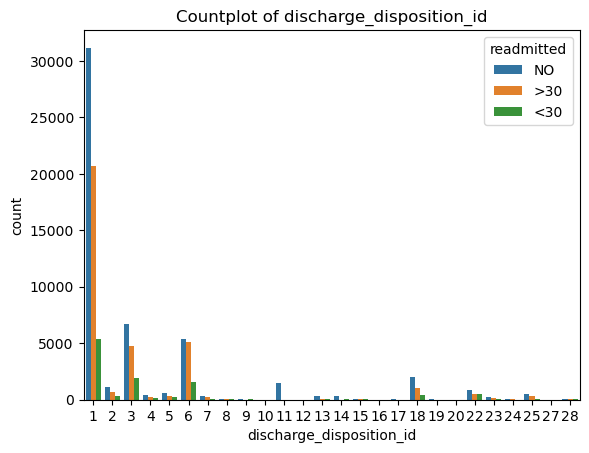

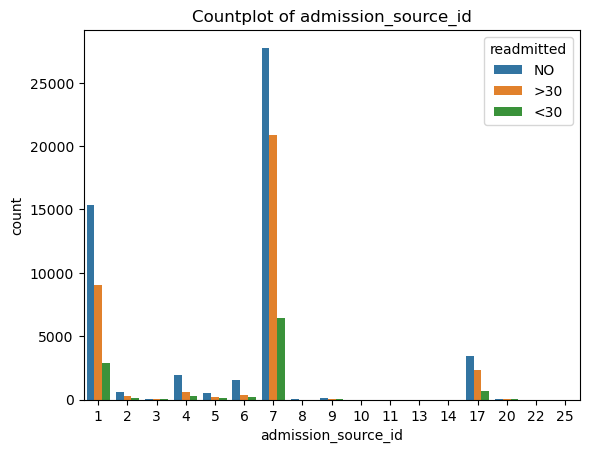

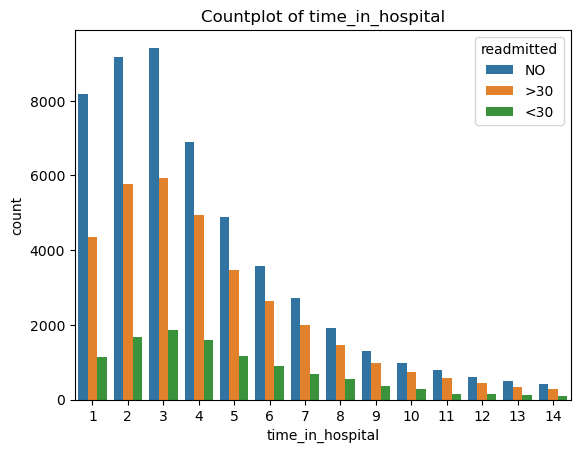

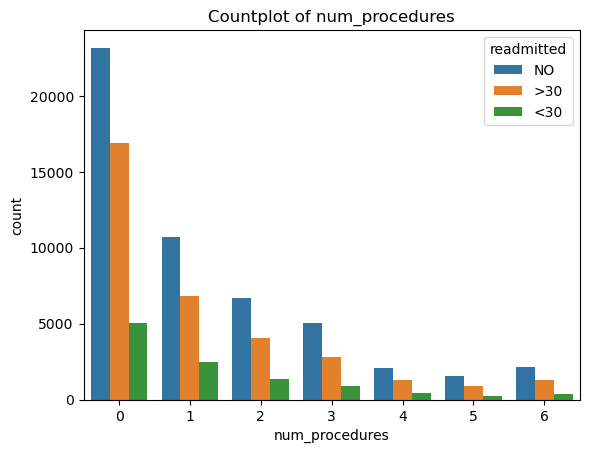

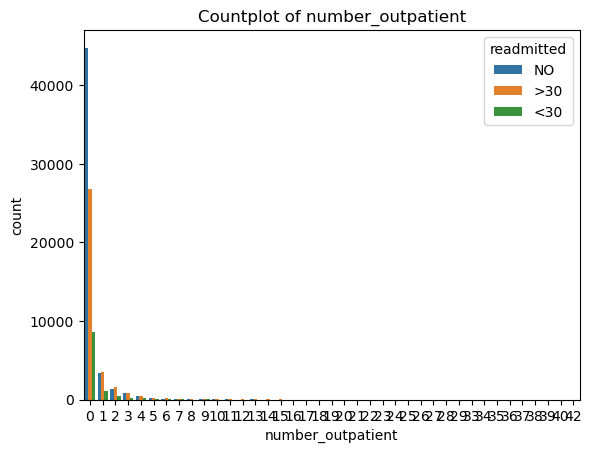

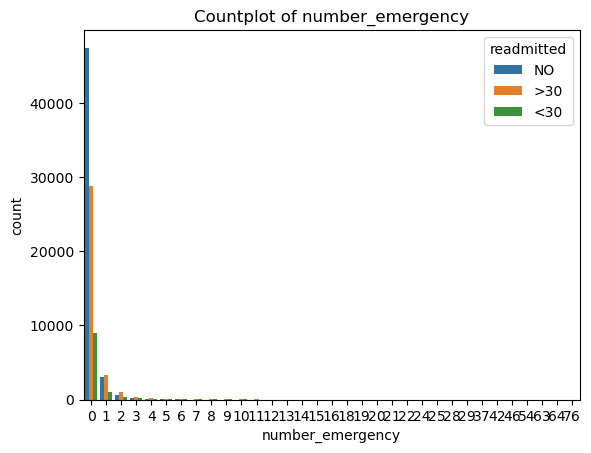

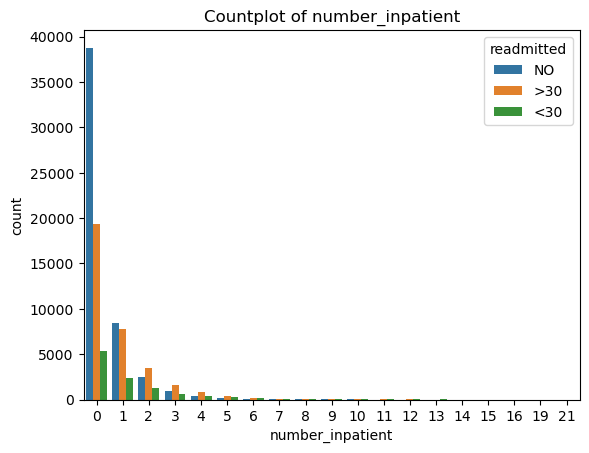

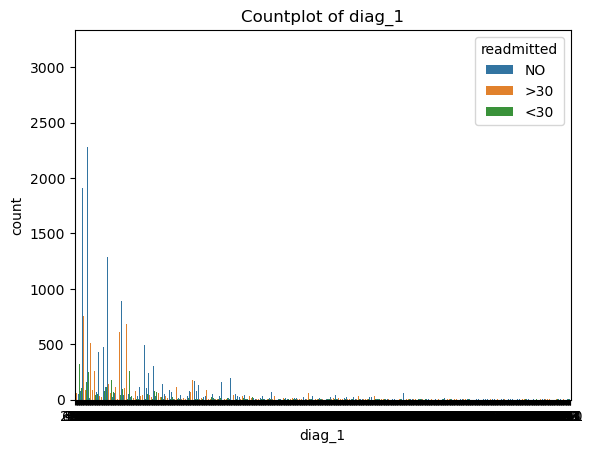

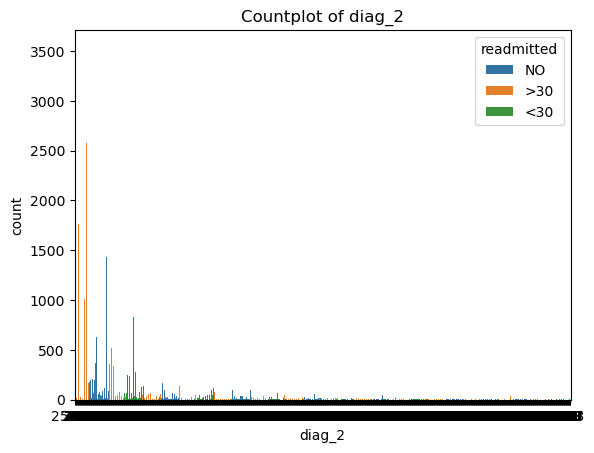

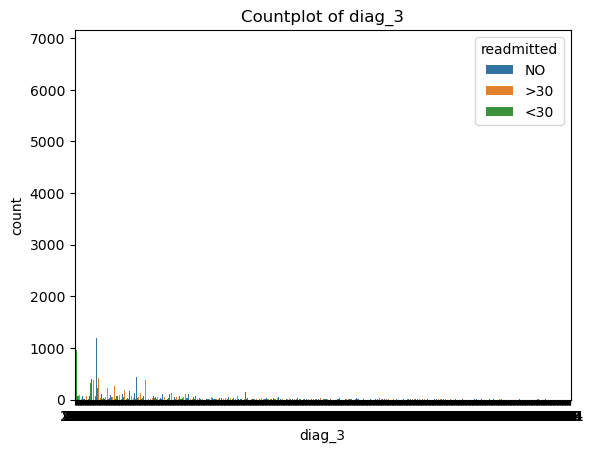

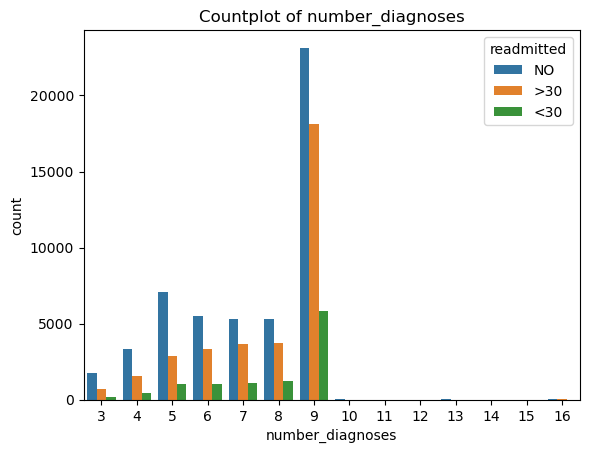

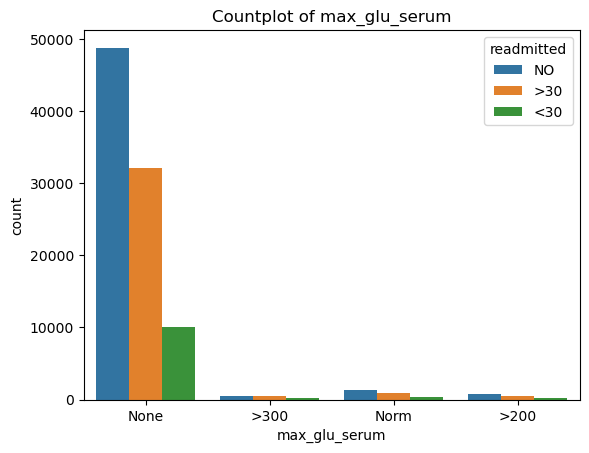

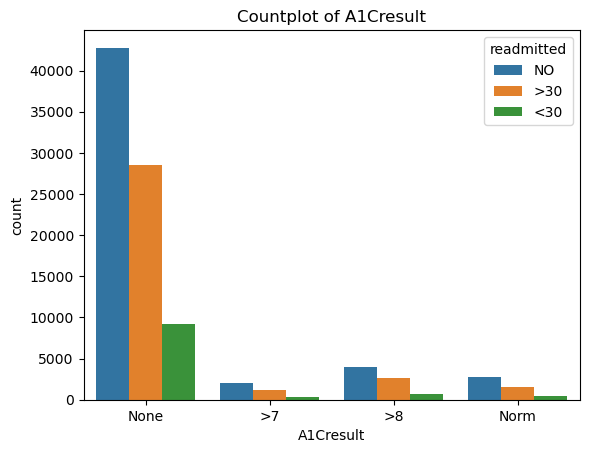

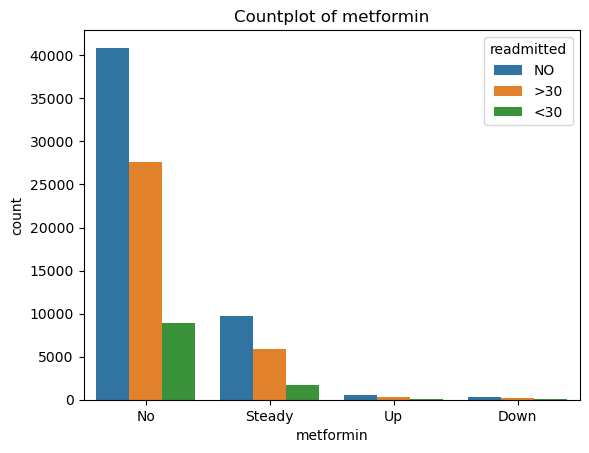

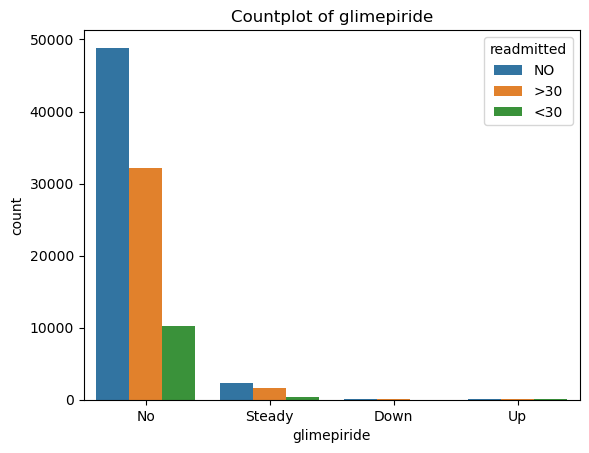

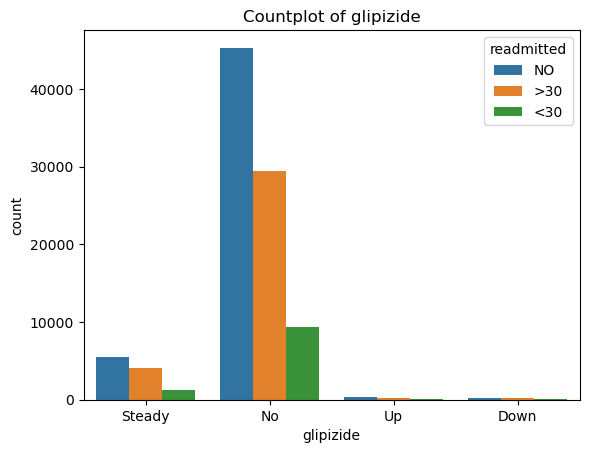

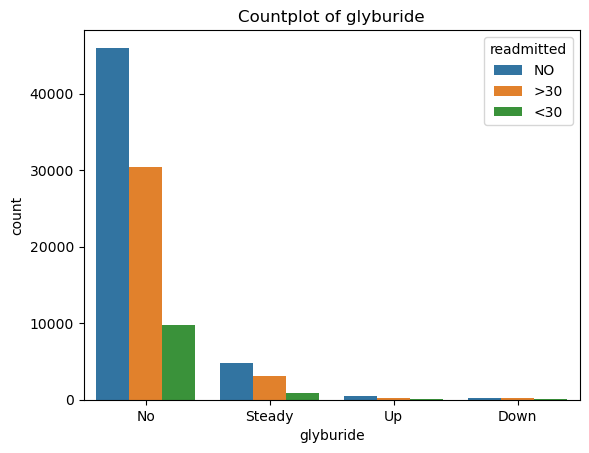

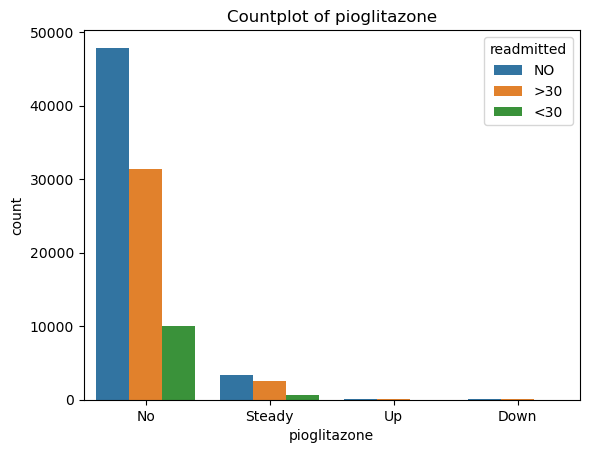

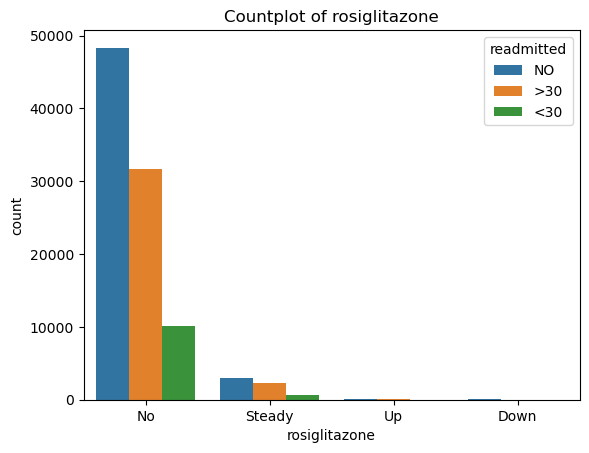

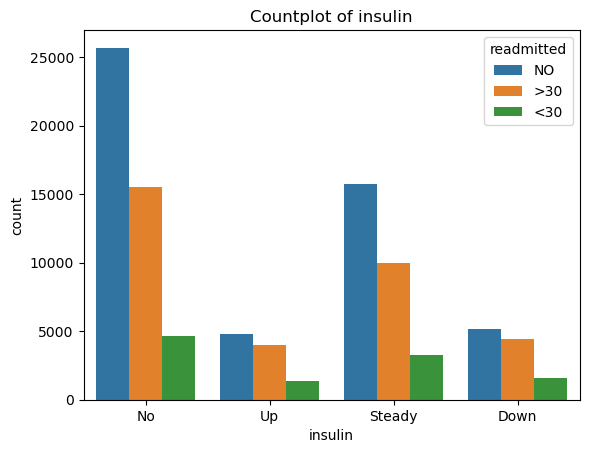

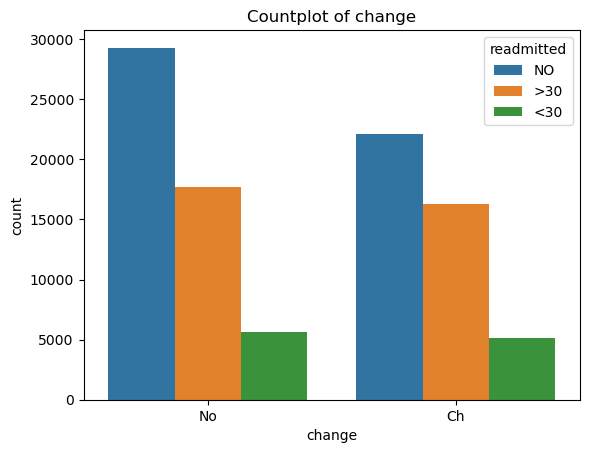

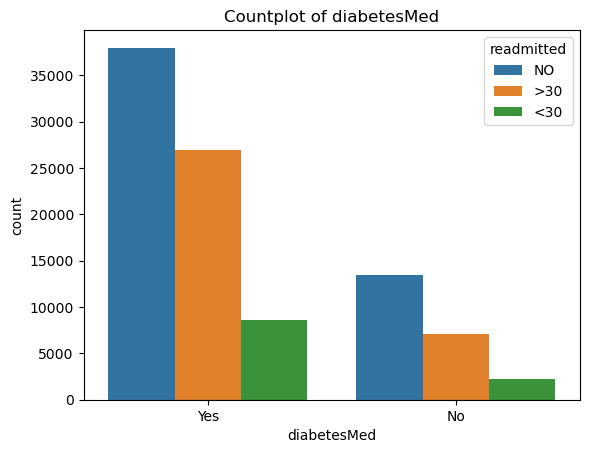

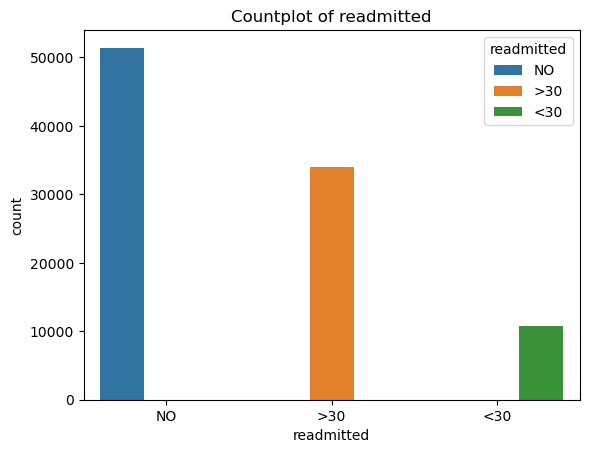

In [167]:
for col in categorical_columns:
    sns.countplot(x=col,hue='readmitted', data=df)
    plt.title(f'Countplot of {col}')
    plt.show()


# aggregating records based on Patient Number and creating new Features

In [168]:
groups_to_show = 1
grouped = df.groupby('patient_nbr')
for i, (name, group) in enumerate(grouped):
    if i >= groups_to_show:
        break
    print(f"Grouped by Patient Number = {name}")
    print(group)


Grouped by Patient Number = 135
        id  encounter_id  patient_nbr       race  gender  age  \
4267  4268      24437208          135  Caucasian  Female   55   
4780  4781      26264286          135  Caucasian  Female   55   

     admission_type_id discharge_disposition_id admission_source_id  \
4267                 2                        1                   1   
4780                 1                        1                   7   

     time_in_hospital  ...  metformin glimepiride  glipizide glyburide  \
4267                8  ...     Steady          No         No      Down   
4780                3  ...     Steady          No         No    Steady   

     pioglitazone rosiglitazone insulin change diabetesMed readmitted  
4267           No            No  Steady     Ch         Yes        <30  
4780           No            No      No     Ch         Yes        >30  

[2 rows x 32 columns]


In [169]:
#Looking out for incorrect data and collecting their PatientIds

grouped = df.groupby('patient_nbr')['race'].unique()
duplicate_race_PatientIds=[]
for patient_nbr, race_values in grouped.items():
    if len(race_values) > 1:
        duplicate_race_PatientIds.append(patient_nbr)
        print(f"Patient {patient_nbr}: Different 'race' values within the group: {race_values}")
print(len(duplicate_race_PatientIds))


Patient 453267: Different 'race' values within the group: ['Other' 'Caucasian']
Patient 561609: Different 'race' values within the group: ['Caucasian' 'Hispanic']
Patient 1147059: Different 'race' values within the group: ['Caucasian' 'Other']
Patient 1226007: Different 'race' values within the group: ['Other' 'Hispanic']
Patient 1243557: Different 'race' values within the group: ['Caucasian' 'AfricanAmerican']
Patient 1553220: Different 'race' values within the group: ['AfricanAmerican' 'Caucasian']
Patient 1756539: Different 'race' values within the group: ['Caucasian' 'AfricanAmerican']
Patient 2940129: Different 'race' values within the group: ['Caucasian' 'Hispanic']
Patient 3228903: Different 'race' values within the group: ['Caucasian' 'AfricanAmerican']
Patient 3588723: Different 'race' values within the group: ['Caucasian' 'AfricanAmerican']
Patient 3616155: Different 'race' values within the group: ['Caucasian' 'AfricanAmerican']
Patient 5142546: Different 'race' values withi

In [170]:
df[df.patient_nbr == 1147059].T

,1629,5064
id,1630,5065
encounter_id,10943376,27055116
patient_nbr,1147059,1147059
race,Caucasian,Other
gender,Male,Male
age,65,65
admission_type_id,1,3
discharge_disposition_id,1,5
admission_source_id,7,1
time_in_hospital,2,3


In [171]:
#Looking out for incorrect gender in patient group data and collecting their patientIds

# handling Gender for same scenario 
grouped = df.groupby('patient_nbr')['gender'].unique()
duplicate_gender_patientIds=[]
for patient_nbr, gender_values in grouped.items():
    if len(gender_values) > 1:
        print(f"Patient {patient_nbr}: Different 'gender' values within the group: {gender_values}")
        duplicate_gender_patientIds.append(patient_nbr)
print(len(duplicate_gender_patientIds))

Patient 40867677: Different 'gender' values within the group: ['Male' 'Female']
Patient 55500588: Different 'gender' values within the group: ['Female' 'Male']
Patient 109210482: Different 'gender' values within the group: ['Female' 'Male']
3


In [172]:
df= df[~df['patient_nbr'].isin(duplicate_gender_patientIds)]
#Removing above patinet records consider as invalid

In [173]:
df.shape

(96147, 32)

In [174]:
df['gender'].value_counts()

Female             51861
Male               44283
Unknown/Invalid        3
Name: gender, dtype: int64

In [175]:
df=df[df['gender'] != 'Unknown/Invalid'] 
# Removing Unknown/Invalid it is very low count

In [176]:
df.shape

(96144, 32)

In [177]:
# handling age for same scenario 
grouped = df.groupby('patient_nbr')['age'].unique()
duplicate_age_ids=[]
count = 0
for patient_nbr, gender_values in grouped.items():
    if len(gender_values) > 1:
        print(f"Patient {patient_nbr}: Different 'age' values within the group: {gender_values}")
        duplicate_age_ids.append(patient_nbr)
print(len(duplicate_age_ids))

Patient 1152: Different 'age' values within the group: [55 65]
Patient 5220: Different 'age' values within the group: [65 75]
Patient 30735: Different 'age' values within the group: [55 65]
Patient 36810: Different 'age' values within the group: [55 65]
Patient 78435: Different 'age' values within the group: [45 55]
Patient 108477: Different 'age' values within the group: [75 85]
Patient 126783: Different 'age' values within the group: [55 65]
Patient 133443: Different 'age' values within the group: [55 65]
Patient 133569: Different 'age' values within the group: [35 45]
Patient 210024: Different 'age' values within the group: [55 65]
Patient 211689: Different 'age' values within the group: [55 65]
Patient 244566: Different 'age' values within the group: [55 65]
Patient 261279: Different 'age' values within the group: [65 75]
Patient 280692: Different 'age' values within the group: [65 75]
Patient 292419: Different 'age' values within the group: [45 55]
Patient 302643: Different 'age' 

In [178]:
grouped = df.groupby('patient_nbr')['age'].unique()
invalid_age_patientIds = []

for patient_nbr, age_values in grouped.items():
    if len(age_values) > 1:
        age_diff = age_values[-1] - age_values[0]
        
        if age_diff < 0:
            print(f"Patient {patient_nbr}: Different 'age' values within the group: {age_diff}")
            invalid_age_patientIds.append(patient_nbr)
            
print(len(invalid_age_patientIds))


Patient 493038: Different 'age' values within the group: -10
Patient 32337963: Different 'age' values within the group: -10
Patient 33581808: Different 'age' values within the group: -10
Patient 33665094: Different 'age' values within the group: -10
Patient 39583782: Different 'age' values within the group: -10
Patient 41325552: Different 'age' values within the group: -10
Patient 54686619: Different 'age' values within the group: -10
Patient 67099194: Different 'age' values within the group: -10
Patient 94422375: Different 'age' values within the group: -10
9


In [179]:
df[df['patient_nbr'] == 54686619]

,id,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
93785,93786,340261544,54686619,Caucasian,Female,95,1,3,5,4,...,No,No,No,No,No,No,Down,Ch,Yes,NO
101492,101493,440170730,54686619,Caucasian,Female,85,2,3,1,4,...,No,No,No,No,No,No,Down,Ch,Yes,>30


In [180]:
df[df['patient_nbr'].isin(invalid_age_patientIds)]

,id,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
293,294,3105702,493038,Caucasian,Female,75,6,25,7,5,...,No,No,No,No,No,No,Steady,No,Yes,>30
6669,6670,32737416,493038,Caucasian,Female,65,1,1,7,4,...,No,No,No,No,No,No,No,No,No,NO
28805,28806,94367076,67099194,Caucasian,Male,75,1,3,5,4,...,No,No,No,No,No,No,No,No,No,<30
29250,29251,95693988,67099194,Caucasian,Male,65,1,3,5,11,...,No,No,No,No,No,No,No,No,No,NO
65747,65748,183523320,33665094,Caucasian,Male,85,1,6,7,6,...,Steady,No,Steady,No,No,No,No,Ch,Yes,>30
77326,77327,234728322,33665094,Caucasian,Male,75,2,6,1,4,...,Steady,No,No,No,No,No,No,Ch,Yes,NO
88783,88784,285894636,39583782,AfricanAmerican,Male,75,3,1,1,12,...,No,No,No,No,No,No,No,No,No,<30
89805,89806,290857584,39583782,AfricanAmerican,Male,65,3,1,1,3,...,No,No,No,No,No,No,No,No,No,NO
93785,93786,340261544,54686619,Caucasian,Female,95,1,3,5,4,...,No,No,No,No,No,No,Down,Ch,Yes,NO
93843,93844,340840256,33581808,Caucasian,Male,85,1,1,7,3,...,No,No,No,No,No,No,Steady,No,Yes,NO


In [181]:
#Removing above rows
df=df[~df['patient_nbr'].isin(invalid_age_patientIds)]

In [182]:
df.shape

(96126, 32)

In [183]:
set(df['diag_1'].unique().tolist()+df['diag_2'].unique().tolist()+df['diag_3'].unique().tolist())

{10,
 11,
 110,
 111,
 112,
 114,
 115,
 117,
 122,
 123,
 130,
 131,
 132,
 133,
 135,
 136,
 138,
 139,
 14,
 140,
 141,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 164,
 17,
 170,
 171,
 172,
 173,
 174,
 175,
 179,
 180,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 207,
 208,
 210,
 211,
 212,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 223,
 225,
 226,
 227,
 228,
 229,
 23,
 230,
 232,
 233,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 244,
 245,
 246,
 250,
 250.01,
 250.02,
 250.03,
 250.1,
 250.11,
 250.12,
 250.13,
 250.2,
 250.21,
 250.22,
 250.23,
 250.3,
 250.31,
 250.32,
 250.33,
 250.4,
 250.41,
 250.42,
 250.43,
 250.5,
 250.51,
 250.52,
 250.53,
 250.6,
 250.7,
 250.8,
 250.81,
 250.82,
 250.83,
 250.9,
 250.91,
 250.92,
 250.93,
 251,
 252,
 253,
 255,
 256,
 258,
 259,
 260,
 261,
 262,
 263,
 26

In [184]:
len(set(df['diag_1'].unique().tolist()+df['diag_2'].unique().tolist()+df['diag_3'].unique().tolist()))

908

In [185]:
#https://en.wikipedia.org/wiki/List_of_ICD-9_codes
def categorize_icd9_code(icd_code):
    try:
        icd_code = float(icd_code)
        if 1 <= icd_code <= 139:
            return "infectious and parasitic diseases"
        elif 140 <= icd_code <= 239:
            return "neoplasms"
        elif 240 <= icd_code <= 279:
            return "endocrine and metabolic diseases"
        elif 280 <= icd_code <= 289:
            return "diseases of blood"
        elif 290 <= icd_code <= 319:
            return "mental disorders"
        elif 320 <= icd_code <= 389:
            return "nervous system and sense organs"
        elif 390 <= icd_code <= 459:
            return "circulatory system"
        elif 460 <= icd_code <= 519:
            return "respiratory system"
        elif 520 <= icd_code <= 579:
            return "digestive system"
        elif 580 <= icd_code <= 629:
            return "genitourinary system"
        elif 630 <= icd_code <= 679:
            return "pregnancy complications"
        elif 680 <= icd_code <= 709:
            return "skin and subcutaneous tissue"
        elif 710 <= icd_code <= 739:
            return "musculoskeletal system"
        elif 740 <= icd_code <= 759:
            return "congenital anomalies"
        elif 760 <= icd_code <= 779:
            return "perinatal period conditions"
        elif 780 <= icd_code <= 799:
            return "ill-defined conditions"
        elif 800 <= icd_code <= 999:
            return "injury and poisoning"
        else:
            return "unknown"
    except:
        # For non-numeric values, including 'E' and 'V' codes
        return "external causes or supplemental"

In [186]:
df['diag_1'] = df['diag_1'].apply(categorize_icd9_code)
df['diag_2'] = df['diag_2'].apply(categorize_icd9_code)
df['diag_3'] = df['diag_3'].apply(categorize_icd9_code)

In [187]:
len(set(df['diag_1'].unique().tolist()+df['diag_2'].unique().tolist()+df['diag_3'].unique().tolist()))

17

In [188]:
df.head().T

,2,3,4,5,6
id,3,4,5,6,7
encounter_id,64410,500364,16680,35754,55842
patient_nbr,86047875,82442376,42519267,82637451,84259809
race,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Male,Male,Male,Male
age,25,35,45,55,65
admission_type_id,1,1,1,2,3
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,2,2
time_in_hospital,2,2,1,3,4


In [189]:
df.columns

Index(['id', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [190]:
#based on my initial analysis there medicensa insulin vs non insulin, so capturing that information is more useful for Diabetes severe prediction

In [191]:
non_insulin_med_cols = ['metformin', 'glimepiride', 'glipizide','glyburide', 'pioglitazone', 'rosiglitazone']
glucose_result_cols= ['max_glu_serum', 'A1Cresult']


In [192]:
for col in df[non_insulin_med_cols]:
    print(df[col].value_counts())
    print('-------------------------------------')

No        77424
Steady    17219
Up          965
Down        518
Name: metformin, dtype: int64
-------------------------------------
No        91242
Steady     4409
Up          294
Down        181
Name: glimepiride, dtype: int64
-------------------------------------
No        84117
Steady    10790
Up          702
Down        517
Name: glipizide, dtype: int64
-------------------------------------
No        86081
Steady     8761
Up          766
Down        518
Name: glyburide, dtype: int64
-------------------------------------
No        89233
Steady     6570
Up          220
Down        103
Name: pioglitazone, dtype: int64
-------------------------------------
No        90113
Steady     5773
Up          160
Down         80
Name: rosiglitazone, dtype: int64
-------------------------------------


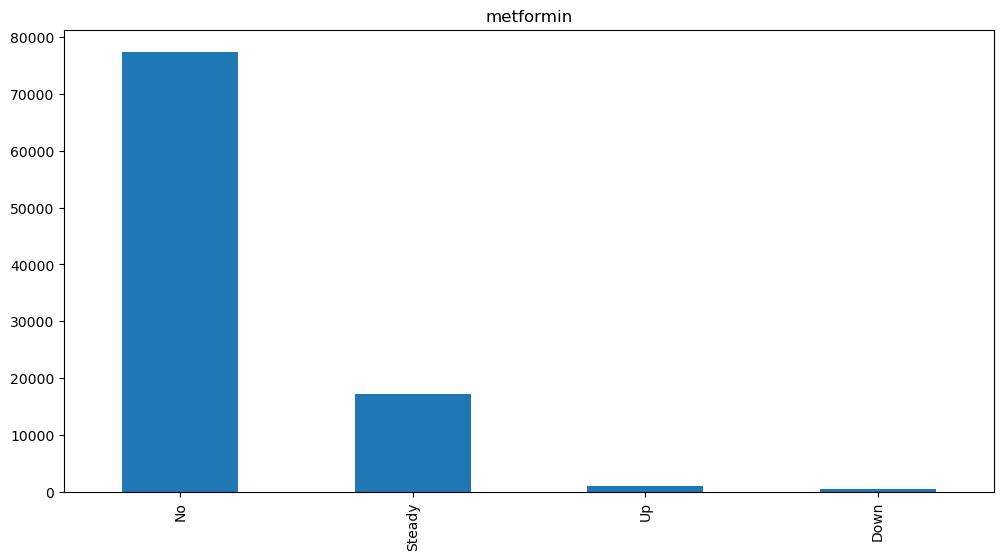

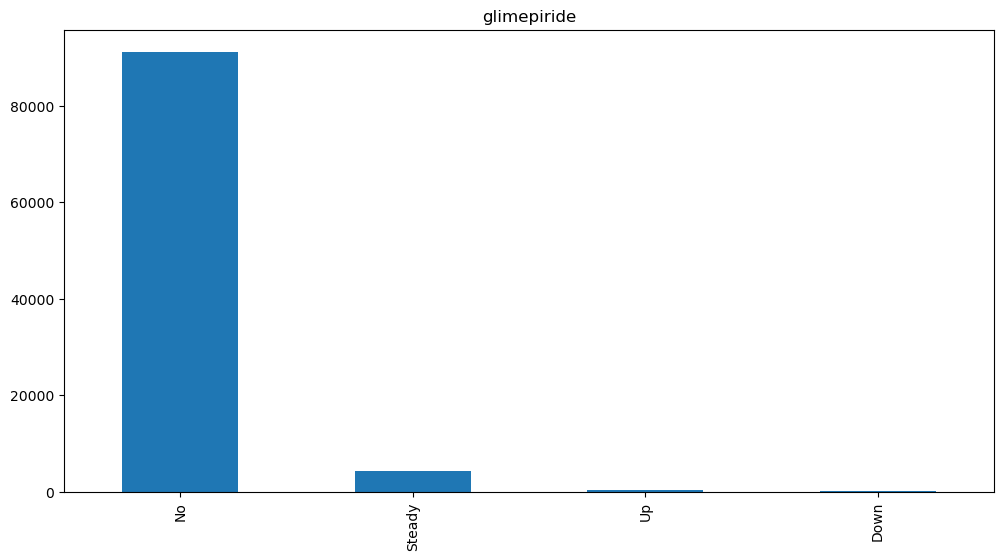

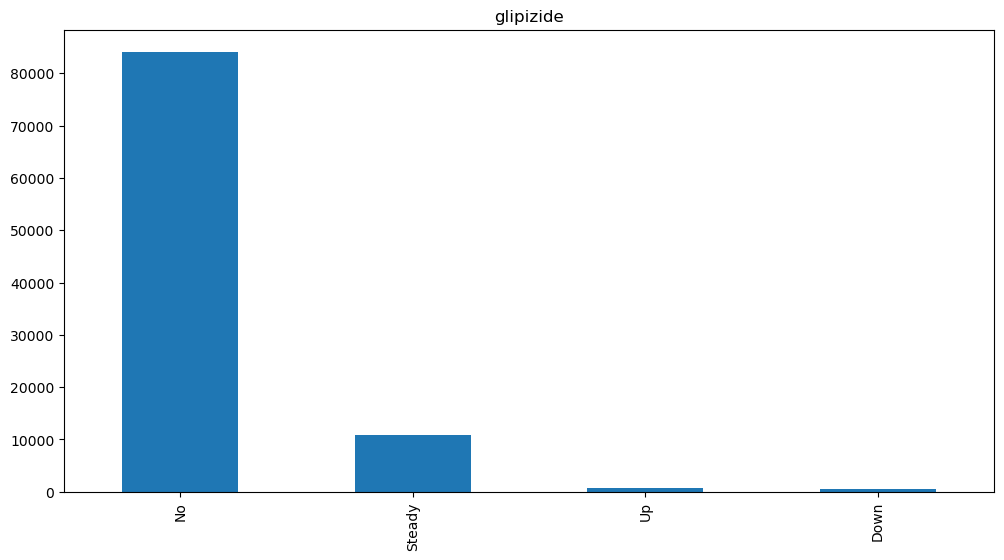

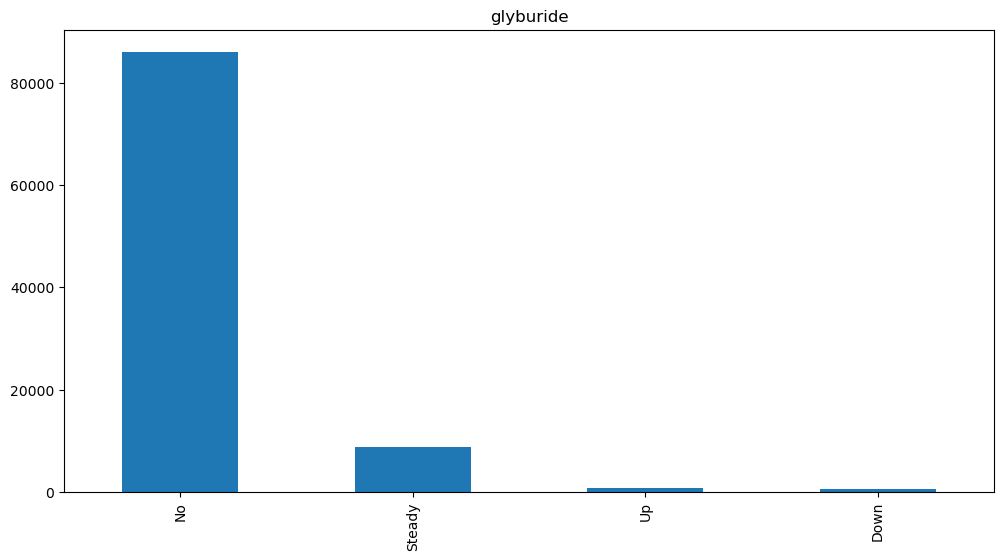

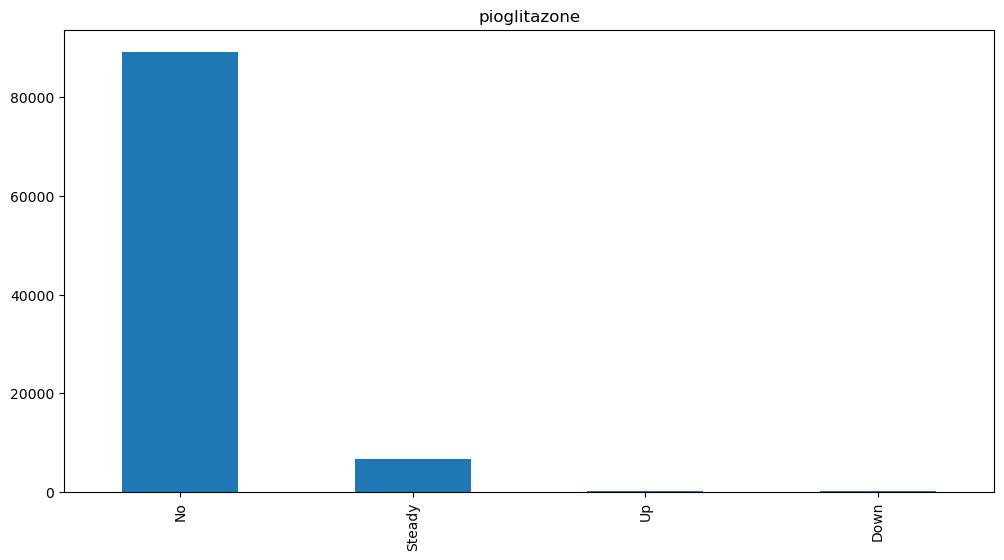

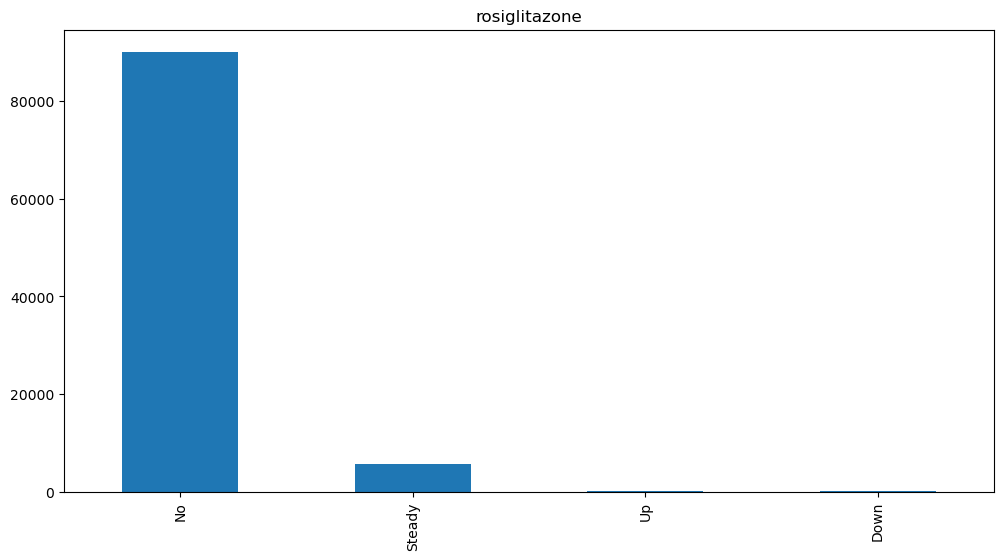

In [193]:
for col in df[non_insulin_med_cols]:
    plt.figure(figsize=(12, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

In [194]:

def categorize_meds(row, non_insulin_meds):
    insulin_count = 0
    non_insulin_count = 0
    
    # Count insulin if it's not 'No'
    if row['insulin'] != 'No':
        insulin_count += 1
    
    # Count non-insulin medications
    for col in non_insulin_meds:
        if row[col] != 'No':
            non_insulin_count += 1

    return pd.Series([insulin_count, non_insulin_count], index=['insulin_count', 'non_insulin_count'])

In [195]:

df[['insulin_count', 'non_insulin_count']] = df.apply(lambda row: categorize_meds(row, non_insulin_med_cols), axis=1)


In [196]:
df['non_insulin_count'].value_counts()
#Binnig this will Give good Result

0    53127
1    29483
2    11526
3     1950
4       39
5        1
Name: non_insulin_count, dtype: int64

In [197]:
df['patient_nbr'].nunique()

67851

In [198]:

# Custom function to get mode
def custom_mode(series):
    mode_value = series.mode()
    return mode_value.iloc[0]

def calculate_percentage(series, value_to_count):
    return (series == value_to_count).mean() * 100

def count_less_30(series):
    return (series == '<30').sum()



# Group by 'patient_nbr' and aggregate
new_df = df.groupby('patient_nbr').agg({
    
    #Demographis
    'age': ['last', 'min', 'max'],  # latest, minimum, and maximum age
    'gender': custom_mode,  # mode of gender
    'race': custom_mode, # mode of race  
    
    #admission Info
    'admission_type_id':['last'],
    'discharge_disposition_id':['last'],
    'admission_source_id':['last'],
    
    #Hospital info
    'time_in_hospital': [ 'last','mean','median'],
    'num_lab_procedures': ['last','mean','median'],
    'num_procedures': ['last','mean', 'median'],
    'num_medications':['last','mean','median'],
    'number_outpatient':['last','mean','median'],
    'number_emergency':['last','mean','median'],
    'number_inpatient':['last','mean','median'],
    'number_diagnoses':['last','mean', 'median'],
    
    
    #dignoseCodes
    'diag_1':['last',custom_mode],
    'diag_2':['last',custom_mode],
    'diag_3':['last',custom_mode],
    
    
    #medications
    'metformin':['last'],
     'glimepiride':['last'],
     'glipizide':['last'],
     'glyburide':['last'],
     'pioglitazone':['last'],
     'rosiglitazone':['last'],
     'insulin':['last'],
    
    'insulin_count': ['last','sum'],
    'non_insulin_count': ['last','sum'],
    
    
    #resultTest
    'max_glu_serum': ['last',pd.Series.nunique],
    'A1Cresult': ['last',pd.Series.nunique],
    
    
    #medication info  
    'change':['last', lambda x: calculate_percentage(x, 'Ch')],
    'diabetesMed':['last', lambda x: calculate_percentage(x, 'Yes')],
    
    #target just considering latest value of a patient
    'readmitted': ['last']
    
}).reset_index()


# Rename the columns to make them easier to work with
new_df.columns = [f"{a}_{b}" if b else a for a, b in new_df.columns]

# Rename the  columns to make it more understandable
new_df.rename(columns={'change_<lambda_0>': 'change_percentage','diabetesMed_<lambda_0>':'diabetesMed_percentage'},
              inplace=True)

# Create a new column 'age_diff' that contains the age difference for each patient
new_df['age_diff'] = new_df['age_max'] - new_df['age_min']

# Show the new DataFrame
print(new_df.head())



   patient_nbr  age_last  age_min  age_max gender_custom_mode  \
0          135        55       55       55             Female   
1          378        55       55       55             Female   
2          729        85       85       85             Female   
3          774        85       85       85             Female   
4          927        35       35       35             Female   

  race_custom_mode admission_type_id_last discharge_disposition_id_last  \
0        Caucasian                      1                             1   
1        Caucasian                      3                             1   
2        Caucasian                      1                             3   
3        Caucasian                      1                             1   
4  AfricanAmerican                      1                             1   

  admission_source_id_last time_in_hospital_last  ...  max_glu_serum_last  \
0                        7                     3  ...                None   
1   

In [199]:
new_df.shape

(67851, 60)

In [200]:
new_df.columns

Index(['patient_nbr', 'age_last', 'age_min', 'age_max', 'gender_custom_mode',
       'race_custom_mode', 'admission_type_id_last',
       'discharge_disposition_id_last', 'admission_source_id_last',
       'time_in_hospital_last', 'time_in_hospital_mean',
       'time_in_hospital_median', 'num_lab_procedures_last',
       'num_lab_procedures_mean', 'num_lab_procedures_median',
       'num_procedures_last', 'num_procedures_mean', 'num_procedures_median',
       'num_medications_last', 'num_medications_mean',
       'num_medications_median', 'number_outpatient_last',
       'number_outpatient_mean', 'number_outpatient_median',
       'number_emergency_last', 'number_emergency_mean',
       'number_emergency_median', 'number_inpatient_last',
       'number_inpatient_mean', 'number_inpatient_median',
       'number_diagnoses_last', 'number_diagnoses_mean',
       'number_diagnoses_median', 'diag_1_last', 'diag_1_custom_mode',
       'diag_2_last', 'diag_2_custom_mode', 'diag_3_last',
     

In [201]:
new_df= new_df.drop('patient_nbr',axis=1)

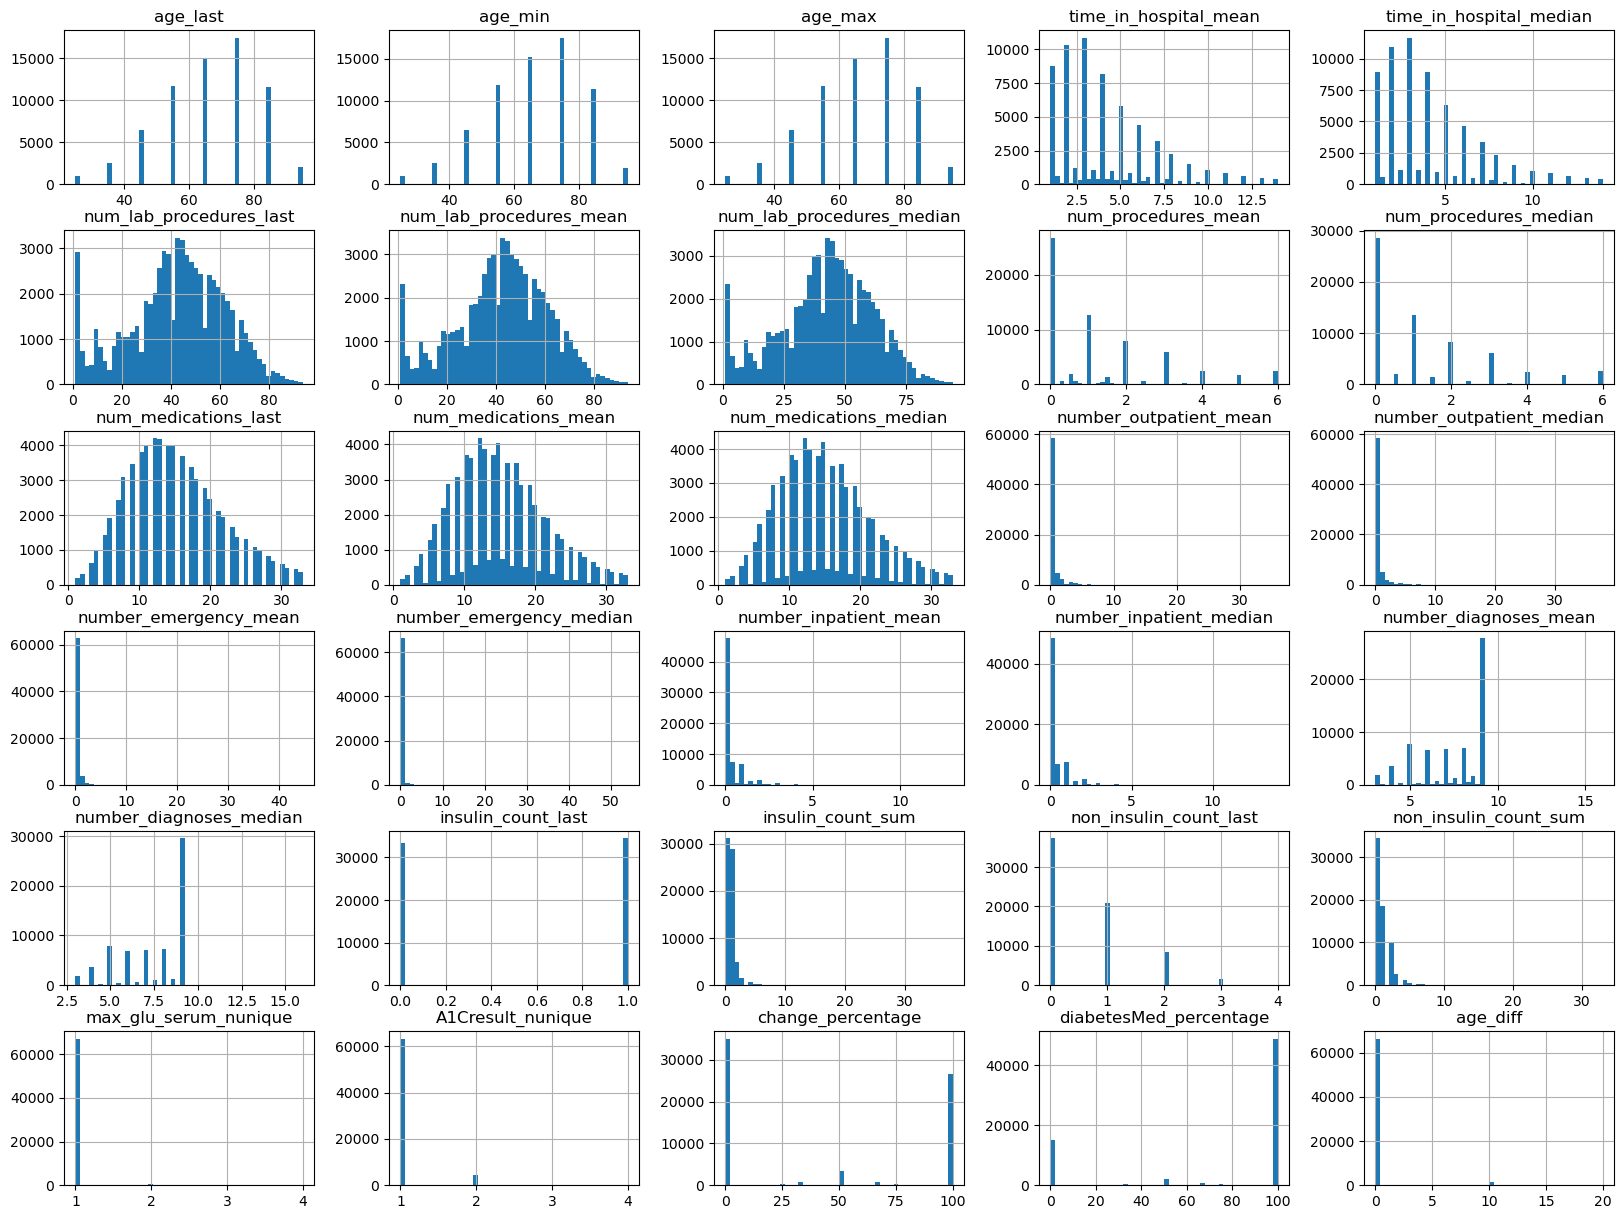

In [202]:
new_df.hist(bins=50,figsize=(20,15))
plt.show()

In [203]:
readmitted_map = {'<30': 2, '>30': 1, 'NO': 0}
# Encode age range to integer labels
new_df['readmitted_last'] = new_df['readmitted_last'].map(readmitted_map)


In [204]:
new_df['readmitted_last'].dtype

dtype('int64')

In [205]:

corr_matrix=new_df.corr()

/var/folders/7d/rd8dgs2s6dzgw53gj513gcmh0000gn/T/ipykernel_1019/4205223010.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=new_df.corr()


In [206]:
corr_matrix['readmitted_last'].sort_values(ascending=False)

readmitted_last              1.000000
number_inpatient_mean        0.233981
number_inpatient_median      0.230025
number_diagnoses_median      0.101899
number_diagnoses_mean        0.100092
num_lab_procedures_median    0.087515
num_lab_procedures_mean      0.086127
num_lab_procedures_last      0.084932
number_emergency_mean        0.080140
number_emergency_median      0.075996
number_outpatient_mean       0.073449
insulin_count_sum            0.072793
num_medications_last         0.072251
number_outpatient_median     0.072081
num_medications_mean         0.070799
num_medications_median       0.069892
non_insulin_count_sum        0.052904
A1Cresult_nunique            0.052782
diabetesMed_percentage       0.052294
time_in_hospital_mean        0.051057
time_in_hospital_median      0.048411
age_max                      0.043587
age_last                     0.043513
age_min                      0.039865
age_diff                     0.039346
insulin_count_last           0.032401
change_perce

In [207]:
#newly created features have good correlation compared to existing features

#creating new feature combining highly correlated * negatively correalted

new_df['number_inpatient_mean_num_procedures_mean']=new_df['number_inpatient_mean']*new_df['num_procedures_mean']

new_df['number_diagnoses_median_num_procedures_median']=new_df['number_diagnoses_median']*new_df['num_procedures_median']

In [208]:

corr_matrix=new_df.corr()
corr_matrix['readmitted_last'].sort_values(ascending=False)

/var/folders/7d/rd8dgs2s6dzgw53gj513gcmh0000gn/T/ipykernel_1019/1420583818.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=new_df.corr()


readmitted_last                                  1.000000
number_inpatient_mean                            0.233981
number_inpatient_median                          0.230025
number_inpatient_mean_num_procedures_mean        0.151070
number_diagnoses_median                          0.101899
number_diagnoses_mean                            0.100092
num_lab_procedures_median                        0.087515
num_lab_procedures_mean                          0.086127
num_lab_procedures_last                          0.084932
number_emergency_mean                            0.080140
number_emergency_median                          0.075996
number_outpatient_mean                           0.073449
insulin_count_sum                                0.072793
num_medications_last                             0.072251
number_outpatient_median                         0.072081
num_medications_mean                             0.070799
num_medications_median                           0.069892
non_insulin_co

In [209]:
set(new_df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [210]:
num_cols = [col for col in new_df.columns if new_df[col].dtype!='O']

In [211]:
num_cols=['age_last',
 'age_min',
 'age_max',
 'admission_type_id_last',
 'discharge_disposition_id_last',
 'admission_source_id_last',
 'time_in_hospital_last',
 'time_in_hospital_mean',
 'time_in_hospital_median',
 'num_lab_procedures_last',
 'num_lab_procedures_mean',
 'num_lab_procedures_median',
 'num_procedures_last',
 'num_procedures_mean',
 'num_procedures_median',
 'num_medications_last',
 'num_medications_mean',
 'num_medications_median',
 'number_outpatient_last',
 'number_outpatient_mean',
 'number_outpatient_median',
 'number_emergency_last',
 'number_emergency_mean',
 'number_emergency_median',
 'number_inpatient_last',
 'number_inpatient_mean',
 'number_inpatient_median',
 'number_diagnoses_last',
 'number_diagnoses_mean',
 'number_diagnoses_median',
 'insulin_count_last',
 'insulin_count_sum',
 'non_insulin_count_last',
 'non_insulin_count_sum',
 'max_glu_serum_nunique',
 'A1Cresult_nunique',
 'change_percentage',
 'diabetesMed_percentage',
 'age_diff',
 'number_inpatient_mean_num_procedures_mean']

In [212]:
cat_cols = [col for col in new_df.columns if new_df[col].dtype=='O']

In [213]:
num_cols = [col for col in new_df.columns if new_df[col].dtype!='O']

In [214]:
num_cols

['age_last',
 'age_min',
 'age_max',
 'time_in_hospital_mean',
 'time_in_hospital_median',
 'num_lab_procedures_last',
 'num_lab_procedures_mean',
 'num_lab_procedures_median',
 'num_procedures_mean',
 'num_procedures_median',
 'num_medications_last',
 'num_medications_mean',
 'num_medications_median',
 'number_outpatient_mean',
 'number_outpatient_median',
 'number_emergency_mean',
 'number_emergency_median',
 'number_inpatient_mean',
 'number_inpatient_median',
 'number_diagnoses_mean',
 'number_diagnoses_median',
 'insulin_count_last',
 'insulin_count_sum',
 'non_insulin_count_last',
 'non_insulin_count_sum',
 'max_glu_serum_nunique',
 'A1Cresult_nunique',
 'change_percentage',
 'diabetesMed_percentage',
 'readmitted_last',
 'age_diff',
 'number_inpatient_mean_num_procedures_mean',
 'number_diagnoses_median_num_procedures_median']

In [215]:
num_cols=['age_last',
 'age_min',
 'age_max',
 'time_in_hospital_mean',
 'time_in_hospital_median',
 'num_lab_procedures_last',
 'num_lab_procedures_mean',
 'num_lab_procedures_median',
 'num_procedures_mean',
 'num_procedures_median',
 'num_medications_last',
 'num_medications_mean',
 'num_medications_median',
 'number_outpatient_mean',
 'number_outpatient_median',
 'number_emergency_mean',
 'number_emergency_median',
 'number_inpatient_mean',
 'number_inpatient_median',
 'number_diagnoses_mean',
 'number_diagnoses_median',
 'insulin_count_last',
 'insulin_count_sum',
 'non_insulin_count_last',
 'non_insulin_count_sum',
 'max_glu_serum_nunique',
 'A1Cresult_nunique',
 'change_percentage',
 'diabetesMed_percentage',
 'age_diff',
 'number_inpatient_mean_num_procedures_mean',
 'number_diagnoses_median_num_procedures_median'] # removed readmitted_last it is target

In [216]:
cat_cols

['gender_custom_mode',
 'race_custom_mode',
 'admission_type_id_last',
 'discharge_disposition_id_last',
 'admission_source_id_last',
 'time_in_hospital_last',
 'num_procedures_last',
 'number_outpatient_last',
 'number_emergency_last',
 'number_inpatient_last',
 'number_diagnoses_last',
 'diag_1_last',
 'diag_1_custom_mode',
 'diag_2_last',
 'diag_2_custom_mode',
 'diag_3_last',
 'diag_3_custom_mode',
 'metformin_last',
 'glimepiride_last',
 'glipizide_last',
 'glyburide_last',
 'pioglitazone_last',
 'rosiglitazone_last',
 'insulin_last',
 'max_glu_serum_last',
 'A1Cresult_last',
 'change_last',
 'diabetesMed_last']

In [217]:
len(new_df.columns)

61

In [218]:
len(cat_cols)+len(num_cols)+1 #which is target

61

In [219]:
new_df.isnull().sum()

age_last                                         0
age_min                                          0
age_max                                          0
gender_custom_mode                               0
race_custom_mode                                 0
                                                ..
diabetesMed_percentage                           0
readmitted_last                                  0
age_diff                                         0
number_inpatient_mean_num_procedures_mean        0
number_diagnoses_median_num_procedures_median    0
Length: 61, dtype: int64

/Users/naresh/pytorch-env/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


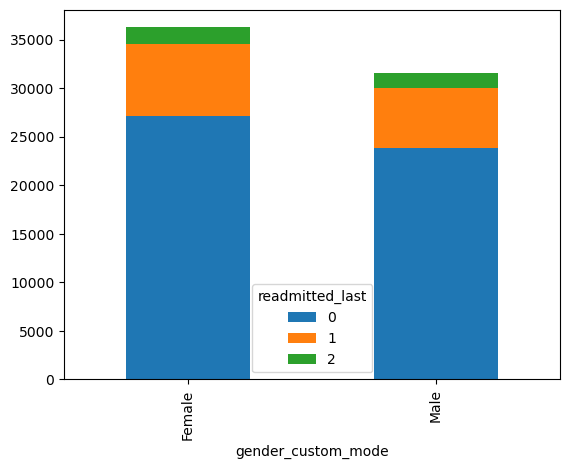

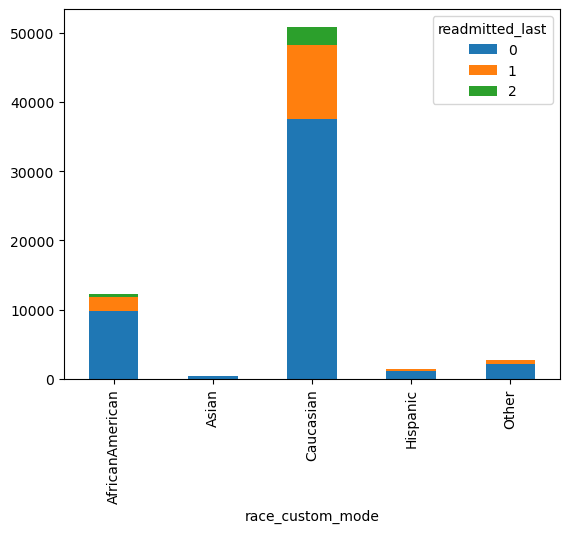

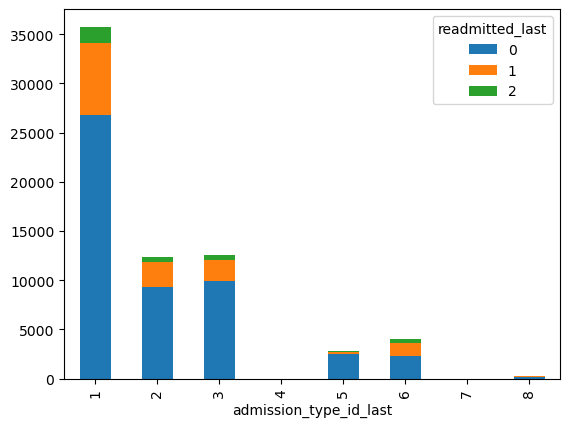

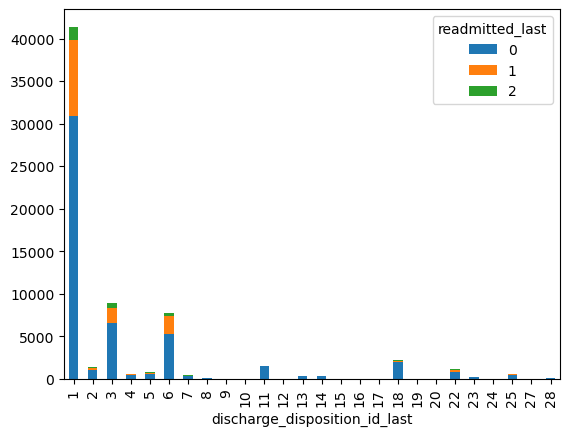

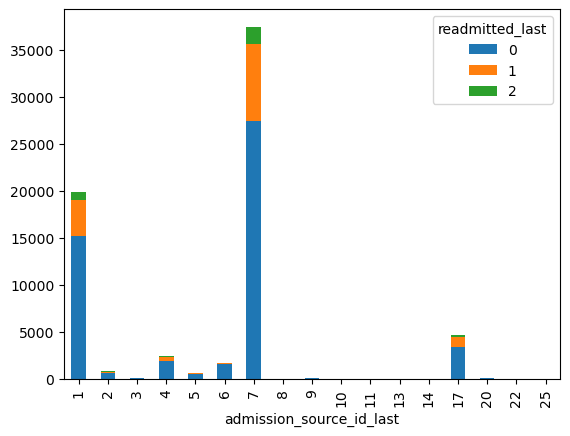

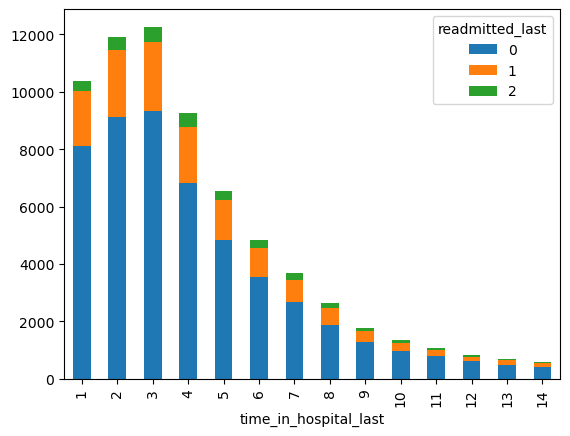

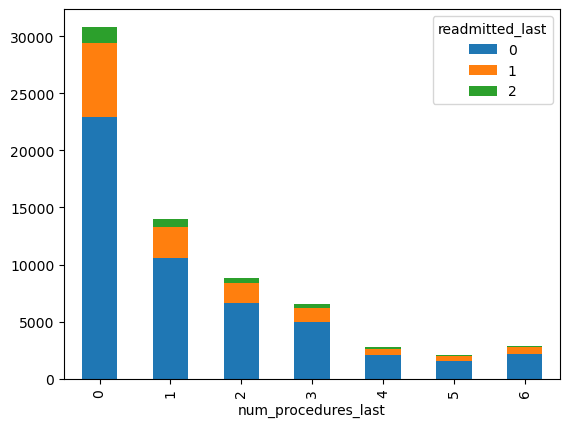

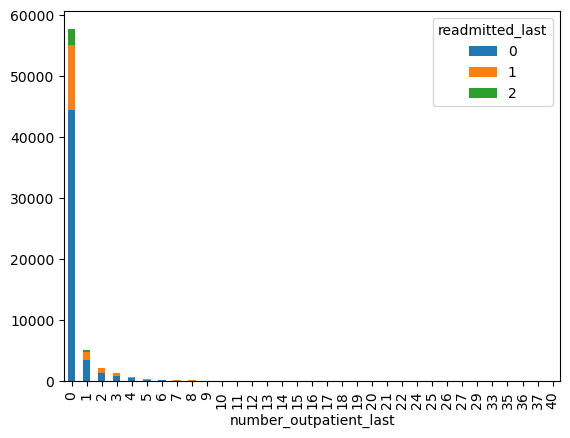

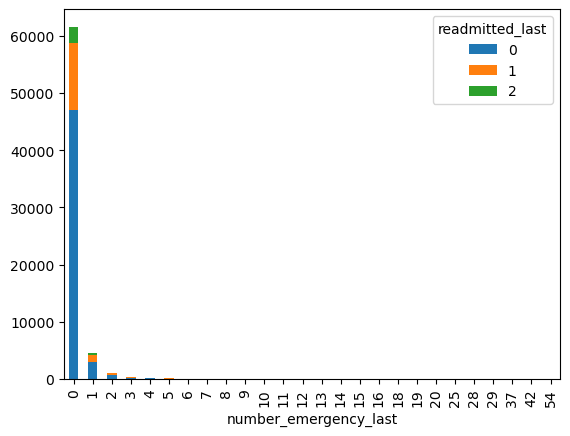

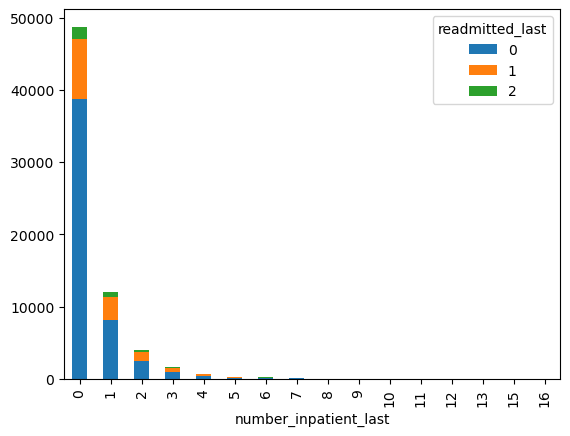

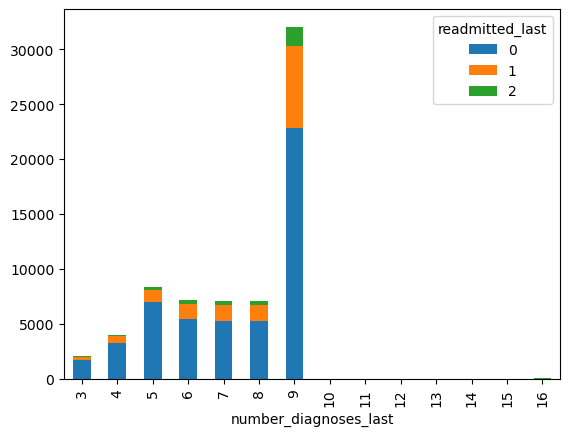

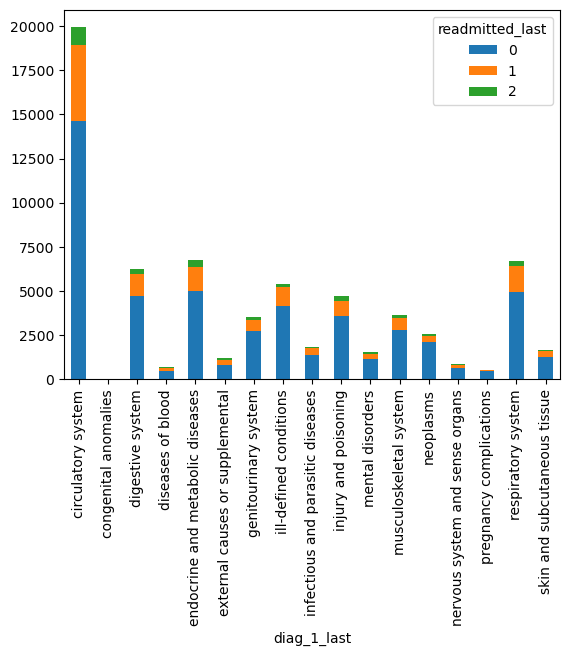

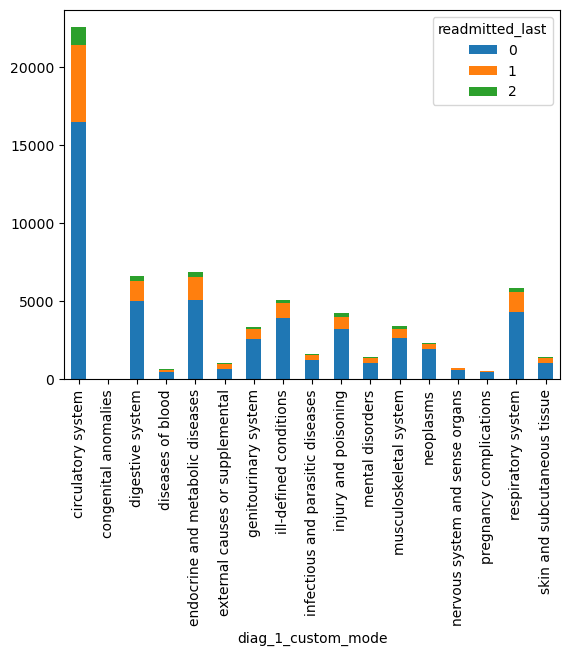

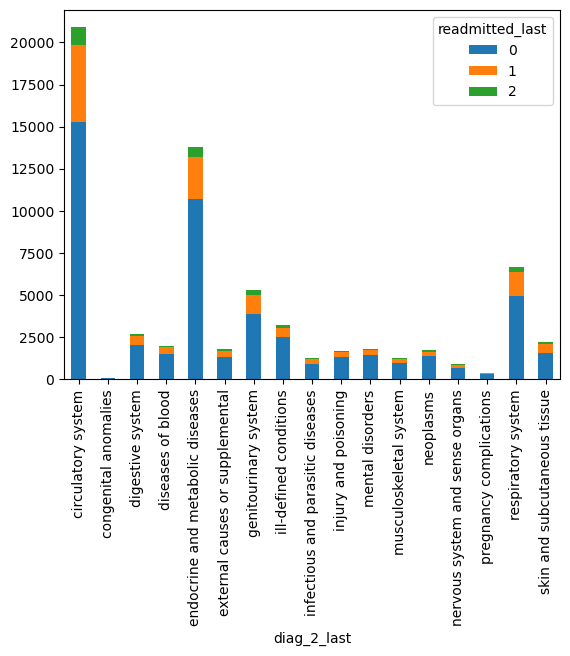

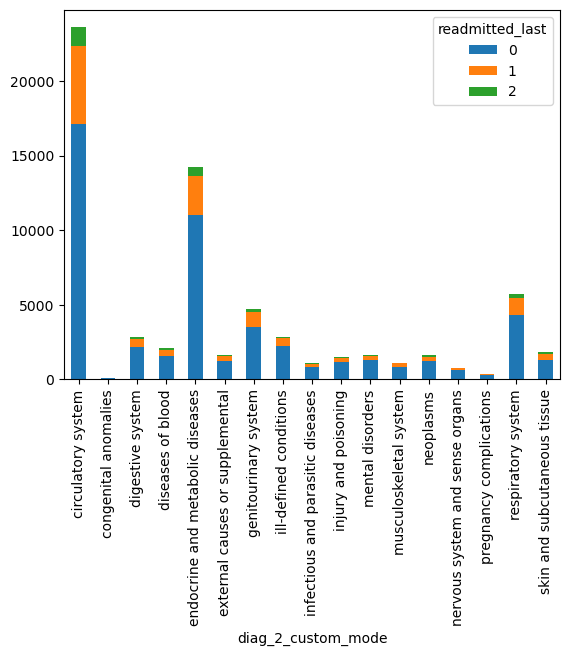

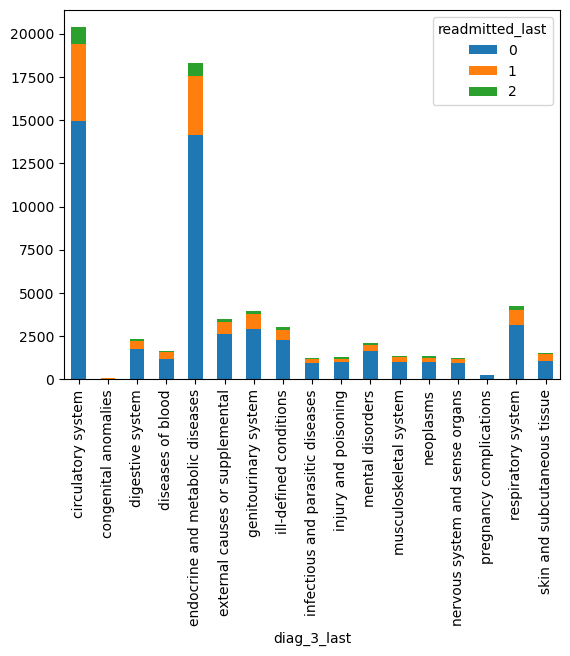

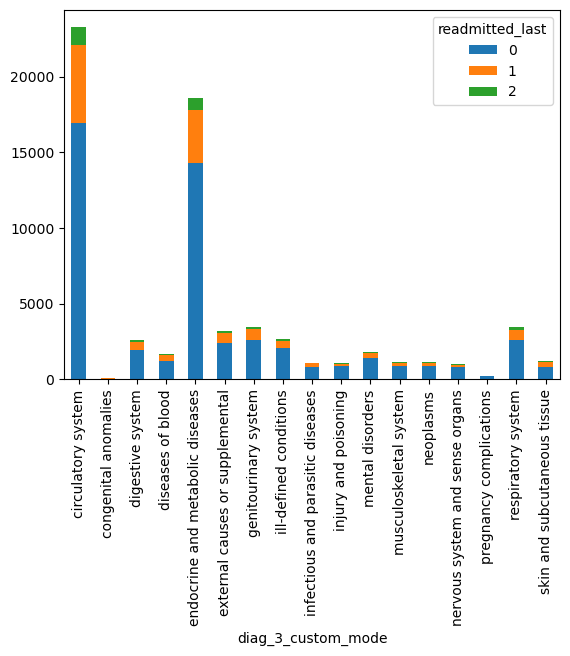

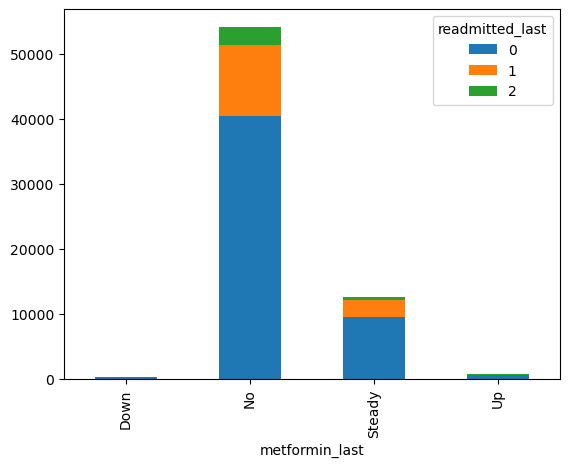

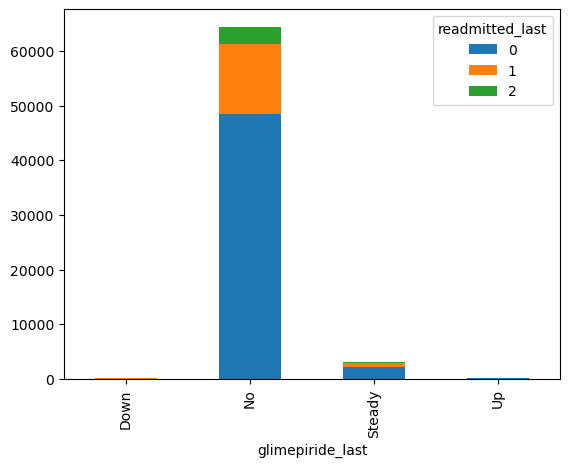

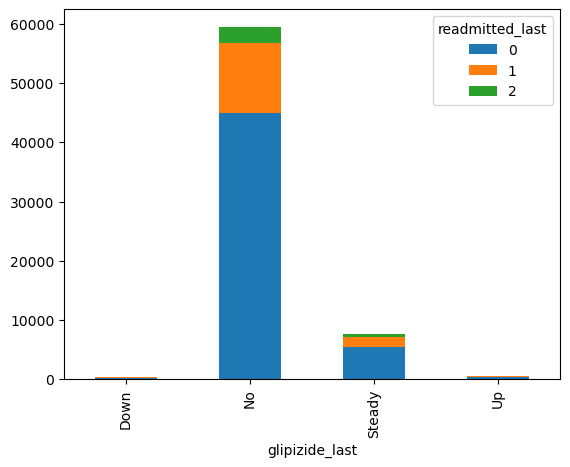

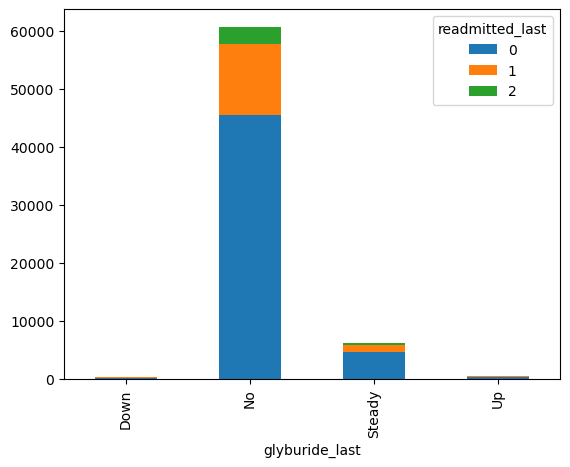

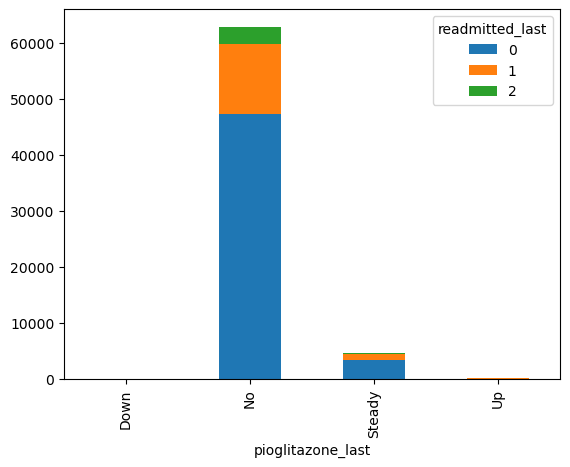

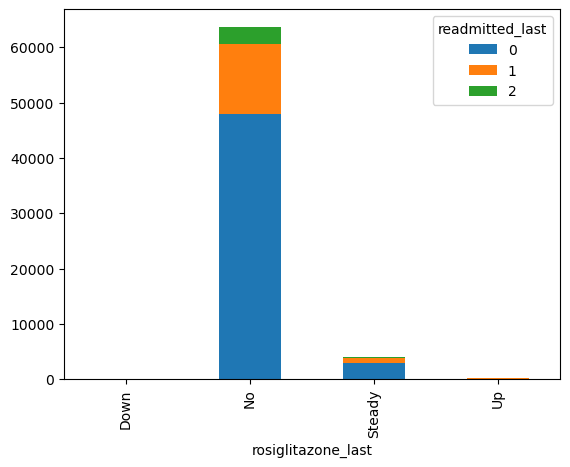

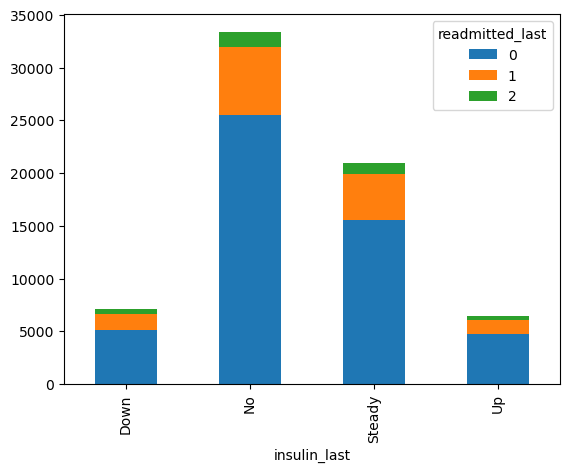

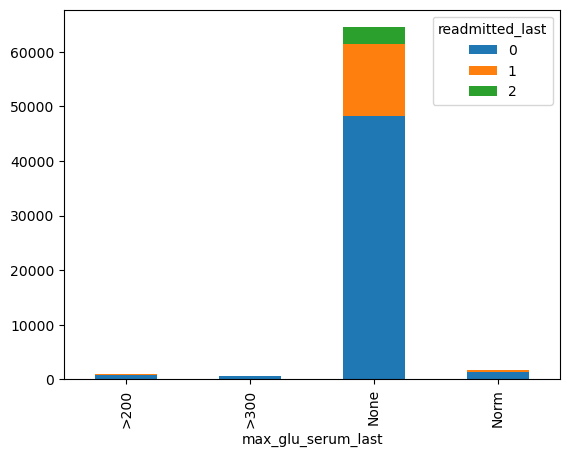

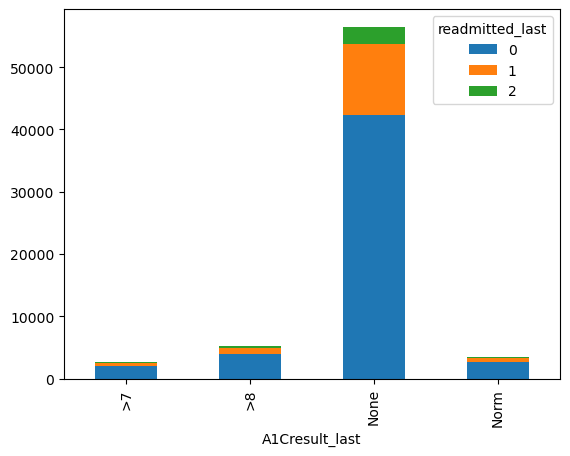

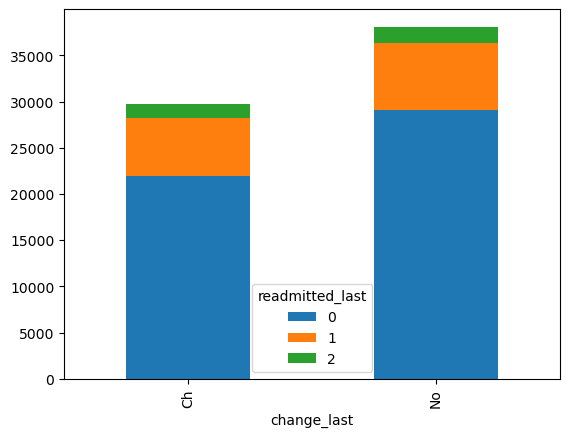

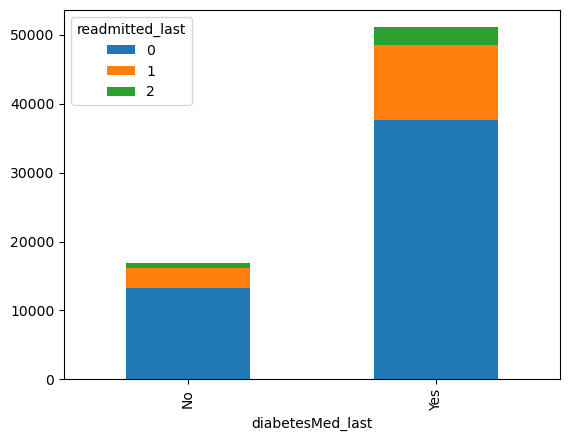

In [220]:
#Visualizations For category Plots
# Stacked
for col in cat_cols:
    pd.crosstab(new_df[col], new_df['readmitted_last']).plot(kind='bar', stacked=True)


In [221]:
used_cols=num_cols+cat_cols

In [222]:
used_cols

['age_last',
 'age_min',
 'age_max',
 'time_in_hospital_mean',
 'time_in_hospital_median',
 'num_lab_procedures_last',
 'num_lab_procedures_mean',
 'num_lab_procedures_median',
 'num_procedures_mean',
 'num_procedures_median',
 'num_medications_last',
 'num_medications_mean',
 'num_medications_median',
 'number_outpatient_mean',
 'number_outpatient_median',
 'number_emergency_mean',
 'number_emergency_median',
 'number_inpatient_mean',
 'number_inpatient_median',
 'number_diagnoses_mean',
 'number_diagnoses_median',
 'insulin_count_last',
 'insulin_count_sum',
 'non_insulin_count_last',
 'non_insulin_count_sum',
 'max_glu_serum_nunique',
 'A1Cresult_nunique',
 'change_percentage',
 'diabetesMed_percentage',
 'age_diff',
 'number_inpatient_mean_num_procedures_mean',
 'number_diagnoses_median_num_procedures_median',
 'gender_custom_mode',
 'race_custom_mode',
 'admission_type_id_last',
 'discharge_disposition_id_last',
 'admission_source_id_last',
 'time_in_hospital_last',
 'num_procedur

In [223]:
# I can see lot data imbalance so clubbing minority group , medicine 
#cahnges are captured using unique columns

med_dict = {'No': 0, 'Steady': 1, 'Up':1 ,'Down':1 }

medlast=['metformin_last',
 'glimepiride_last',
 'glipizide_last',
 'glyburide_last',
 'pioglitazone_last',
 'rosiglitazone_last',
 'insulin_last']

for col in medlast:
    new_df[col] = new_df[col].map(med_dict)


In [224]:
A1Cresult_dict= {'None':-99, '>8':1, 'Norm':0 ,'>7':1}
max_glu_serum_dict={'None':-99, '>200':1, 'Norm':0 ,'>300':1}
change_dict = {'Ch':1,'No':0}
diabetesMed_dict = {'Yes':1,'No':0}


new_df['A1Cresult_last'] = new_df['A1Cresult_last'].map(A1Cresult_dict)
new_df['max_glu_serum_last'] = new_df['max_glu_serum_last'].map(max_glu_serum_dict)
new_df['change_last'] = new_df['change_last'].map(change_dict)
new_df['diabetesMed_last'] = new_df['diabetesMed_last'].map(diabetesMed_dict)

In [225]:
new_df['diabetesMed_last'].value_counts()

1    51034
0    16817
Name: diabetesMed_last, dtype: int64

In [226]:
from sklearn.preprocessing import LabelEncoder   
    
label_encoder = LabelEncoder()
for col in [col for col in new_df.columns if new_df[col].dtype=='object']:
    new_df[col] = label_encoder.fit_transform(new_df[col])


In [227]:
new_df.head().T

,0,1,2,3,4
age_last,55.00,55.0,85.0,85.0,35.0
age_min,55.00,55.0,85.0,85.0,35.0
age_max,55.00,55.0,85.0,85.0,35.0
gender_custom_mode,0.00,0.0,0.0,0.0,0.0
race_custom_mode,2.00,2.0,2.0,2.0,0.0
...,...,...,...,...,...
diabetesMed_percentage,100.00,0.0,100.0,100.0,100.0
readmitted_last,1.00,0.0,0.0,0.0,0.0
age_diff,0.00,0.0,0.0,0.0,0.0
number_inpatient_mean_num_procedures_mean,1.75,0.0,0.0,0.0,0.0


In [228]:
y=new_df['readmitted_last']
X=new_df.drop('readmitted_last',axis=1)

In [229]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=20)
X,y = smt.fit_resample(X, y)
#Since target and other features are imbalence using smote it creates new sythetic data of minority groups

In [230]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [231]:
X_train.shape

(114619, 60)

In [232]:
X_test.shape

(38207, 60)

In [233]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[num_cols]=sc.fit_transform(X_train[num_cols])
X_test[num_cols]=sc.transform(X_test[num_cols])
#standard scaling to make each and every numerical variable on same scale


In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

lg_model = LogisticRegression(multi_class='auto', solver='lbfgs')
lg_model.fit(X_train, y_train)

/Users/naresh/pytorch-env/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [235]:
# Make predictions on test data
y_pred = lg_model.predict(X_test)


print('---------------------Test validation-----------')
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression Classification Report:\n{classification_report(y_test, y_pred)}")

---------------------Test validation-----------
Logistic Regression Accuracy: 0.528306331300547
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.72      0.63     12676
           1       0.44      0.39      0.42     12663
           2       0.57      0.47      0.52     12868

    accuracy                           0.53     38207
   macro avg       0.52      0.53      0.52     38207
weighted avg       0.52      0.53      0.52     38207



In [236]:

from sklearn.metrics import accuracy_score,f1_score, classification_report
# Initialize and fit the XGBoost model
model = xgb.XGBClassifier(objective='multi:softprob', num_class=3)
model.fit(X_train, y_train)


/Users/naresh/pytorch-env/env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/naresh/pytorch-env/env/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:48:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_class=3, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [237]:
# Make predictions on test data
y_pred = model.predict(X_test)
print('---------------------Test validation-----------')
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

---------------------Test validation-----------
Accuracy: 0.7889653728374382
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86     12676
           1       0.77      0.59      0.67     12663
           2       0.81      0.82      0.82     12868

    accuracy                           0.79     38207
   macro avg       0.79      0.79      0.78     38207
weighted avg       0.79      0.79      0.78     38207



In [ ]:
# XgBoost done Well Compared to LogisticRegression So sticking With this.
# We have ended up with Some Decent F1- Score so we are good to predict our patient is going to be High--2,Medium-1,Low Diabetes Severity Using our Model

# Case Study Summary